# 使用全链接神经网络进行训练

## 1 导入数据

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("../../kaggle/LosAngelesHousePricesForecast/data/train_1.csv")
if 'Unnamed: 0' in train.columns: 
    train = train.drop(['Unnamed: 0'], axis=1)
y = train["SalePrice"]
train1 = train.drop(["Id", "SalePrice"], axis=1)
X = pd.get_dummies(train1).reset_index(drop=True)
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2,random_state = 123)   

In [3]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### 评估函数

In [4]:
def benchmark(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    return rmse, logrmse

## 2 模型训练

In [5]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Using TensorFlow backend.


In [6]:
keras.__version__

'2.2.4'

In [7]:
tf.__version__

'1.12.0'

In [8]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(300,activation="relu")) 
    model.add(Dropout(0.2))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [9]:
model = KerasRegressor(build_fn=create_model)

In [10]:
batch_size = [16, 32, 48, 64, 80, 96]
epochs = [500, 1000, 2000, 3000, 3500, 4000]

param_grid = dict(batch_size=batch_size,epochs=epochs)
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, verbose=0, n_jobs=-1,random_state=123)
result = rscv.fit(X_train, y_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4000
1168/1168 [==============================] - 0s 309us/step - loss: 38260774182.5753
Epoch 2/4000
1168/1168 [==============================] - 0s 48us/step - loss: 25178963939.9452
Epoch 3/4000
1168/1168 [==============================] - 0s 48us/step - loss: 7336703210.9589
Epoch 4/4000
1168/1168 [==============================] - 0s 47us/step - loss: 5338016953.8630
Epoch 5/4000
1168/1168 [==============================] - 0s 48us/step - loss: 4558897320.3288
Epoch 6/4000
1168/1168 [==============================] - 0s 46us/step - loss: 4219703534.4658
Epoch 7/4000
1168/1168 [==============================] - 0s 47us/step - loss: 3876495042.6301
Epoch 8/4000
1168/1168 [==============================] - 0s 48us/step - loss: 3591904508.4932
Epoch 9/4000
1168/1168 [==============================] - 0s 47us/step - loss: 3386917418.0822
Epoch 10/4000
1168/1168 [==============================] - 0s 47us/step - loss: 3340189327.7808
Epoch 11/4000
1168/1168 [=====================

1168/1168 [==============================] - 0s 48us/step - loss: 2022970397.8082
Epoch 87/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1925559742.2466
Epoch 88/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1887353840.2192
Epoch 89/4000
1168/1168 [==============================] - 0s 49us/step - loss: 1920484258.1918
Epoch 90/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1956501148.9315
Epoch 91/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1947331520.8767
Epoch 92/4000
1168/1168 [==============================] - 0s 46us/step - loss: 1879519509.0411
Epoch 93/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1983509801.2055
Epoch 94/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1838401728.8767
Epoch 95/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1896023160.9863
Epoch 96/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 47us/step - loss: 1556491659.3973
Epoch 171/4000
1168/1168 [==============================] - 0s 46us/step - loss: 1490563181.5890
Epoch 172/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1624088781.1507
Epoch 173/4000
1168/1168 [==============================] - 0s 46us/step - loss: 1549887579.1781
Epoch 174/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1542618460.9315
Epoch 175/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1548788934.1370
Epoch 176/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1645297486.0274
Epoch 177/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1502818926.0274
Epoch 178/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1585637916.0548
Epoch 179/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1488404120.5479
Epoch 180/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 1363218134.7945
Epoch 255/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1327325756.4932
Epoch 256/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1369080760.1096
Epoch 257/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1387090434.6301
Epoch 258/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1361185975.2329
Epoch 259/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1496848990.6849
Epoch 260/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1345859074.6301
Epoch 261/4000
1168/1168 [==============================] - 0s 49us/step - loss: 1365710300.0548
Epoch 262/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1362657989.2603
Epoch 263/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1382407495.0137
Epoch 264/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 1054656022.7945
Epoch 339/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1036158240.4384
Epoch 340/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1042839715.5068
Epoch 341/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1025471412.8219
Epoch 342/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1048077391.7808
Epoch 343/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1063248487.4521
Epoch 344/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1045447370.5205
Epoch 345/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1075387679.5616
Epoch 346/4000
1168/1168 [==============================] - 0s 48us/step - loss: 1033621081.4247
Epoch 347/4000
1168/1168 [==============================] - 0s 47us/step - loss: 1115183715.9452
Epoch 348/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 910939157.9178
Epoch 424/4000
1168/1168 [==============================] - 0s 48us/step - loss: 892844967.4521
Epoch 425/4000
1168/1168 [==============================] - 0s 47us/step - loss: 859194494.2466
Epoch 426/4000
1168/1168 [==============================] - 0s 47us/step - loss: 841622499.9452
Epoch 427/4000
1168/1168 [==============================] - 0s 48us/step - loss: 894998121.6438
Epoch 428/4000
1168/1168 [==============================] - 0s 48us/step - loss: 940594650.7397
Epoch 429/4000
1168/1168 [==============================] - 0s 48us/step - loss: 859738423.2329
Epoch 430/4000
1168/1168 [==============================] - 0s 48us/step - loss: 897016718.9041
Epoch 431/4000
1168/1168 [==============================] - 0s 47us/step - loss: 834861031.4521
Epoch 432/4000
1168/1168 [==============================] - 0s 47us/step - loss: 877165716.1644
Epoch 433/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 782504054.7945
Epoch 509/4000
1168/1168 [==============================] - 0s 47us/step - loss: 759579492.3836
Epoch 510/4000
1168/1168 [==============================] - 0s 48us/step - loss: 762219483.1781
Epoch 511/4000
1168/1168 [==============================] - 0s 47us/step - loss: 728562727.4521
Epoch 512/4000
1168/1168 [==============================] - 0s 48us/step - loss: 675734812.9315
Epoch 513/4000
1168/1168 [==============================] - 0s 48us/step - loss: 765019170.6301
Epoch 514/4000
1168/1168 [==============================] - 0s 46us/step - loss: 720177830.5753
Epoch 515/4000
1168/1168 [==============================] - 0s 47us/step - loss: 773700081.0959
Epoch 516/4000
1168/1168 [==============================] - 0s 48us/step - loss: 797208243.7260
Epoch 517/4000
1168/1168 [==============================] - 0s 50us/step - loss: 727518105.4247
Epoch 518/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 614907806.6849
Epoch 594/4000
1168/1168 [==============================] - 0s 48us/step - loss: 615687606.7945
Epoch 595/4000
1168/1168 [==============================] - 0s 48us/step - loss: 659524894.2466
Epoch 596/4000
1168/1168 [==============================] - 0s 47us/step - loss: 676425803.8356
Epoch 597/4000
1168/1168 [==============================] - 0s 47us/step - loss: 614567378.4110
Epoch 598/4000
1168/1168 [==============================] - 0s 47us/step - loss: 636167954.4110
Epoch 599/4000
1168/1168 [==============================] - 0s 47us/step - loss: 642814618.7397
Epoch 600/4000
1168/1168 [==============================] - 0s 48us/step - loss: 641347211.3973
Epoch 601/4000
1168/1168 [==============================] - 0s 48us/step - loss: 616159931.6164
Epoch 602/4000
1168/1168 [==============================] - 0s 48us/step - loss: 719249649.5342
Epoch 603/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 683188113.5342
Epoch 679/4000
1168/1168 [==============================] - 0s 47us/step - loss: 547134647.2329
Epoch 680/4000
1168/1168 [==============================] - 0s 48us/step - loss: 569855697.9726
Epoch 681/4000
1168/1168 [==============================] - 0s 47us/step - loss: 532819824.2192
Epoch 682/4000
1168/1168 [==============================] - 0s 47us/step - loss: 615912948.1644
Epoch 683/4000
1168/1168 [==============================] - 0s 47us/step - loss: 603621621.0411
Epoch 684/4000
1168/1168 [==============================] - 0s 47us/step - loss: 721291864.9863
Epoch 685/4000
1168/1168 [==============================] - 0s 48us/step - loss: 602816762.7397
Epoch 686/4000
1168/1168 [==============================] - 0s 48us/step - loss: 626160764.9315
Epoch 687/4000
1168/1168 [==============================] - 0s 48us/step - loss: 576703075.5068
Epoch 688/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 544920847.7808
Epoch 764/4000
1168/1168 [==============================] - 0s 48us/step - loss: 490685830.5753
Epoch 765/4000
1168/1168 [==============================] - 0s 48us/step - loss: 580239935.1233
Epoch 766/4000
1168/1168 [==============================] - 0s 47us/step - loss: 547398479.3425
Epoch 767/4000
1168/1168 [==============================] - 0s 48us/step - loss: 659211631.7808
Epoch 768/4000
1168/1168 [==============================] - 0s 47us/step - loss: 579761507.9452
Epoch 769/4000
1168/1168 [==============================] - 0s 47us/step - loss: 600325165.5890
Epoch 770/4000
1168/1168 [==============================] - 0s 50us/step - loss: 517051293.8082
Epoch 771/4000
1168/1168 [==============================] - 0s 48us/step - loss: 548895675.1781
Epoch 772/4000
1168/1168 [==============================] - 0s 47us/step - loss: 525780267.8356
Epoch 773/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 47us/step - loss: 474653210.7397
Epoch 849/4000
1168/1168 [==============================] - 0s 47us/step - loss: 608328577.5342
Epoch 850/4000
1168/1168 [==============================] - 0s 48us/step - loss: 515959185.0959
Epoch 851/4000
1168/1168 [==============================] - 0s 49us/step - loss: 543005462.7945
Epoch 852/4000
1168/1168 [==============================] - 0s 47us/step - loss: 632673721.8630
Epoch 853/4000
1168/1168 [==============================] - 0s 48us/step - loss: 569413496.1096
Epoch 854/4000
1168/1168 [==============================] - 0s 47us/step - loss: 520157983.1233
Epoch 855/4000
1168/1168 [==============================] - 0s 50us/step - loss: 489850742.3562
Epoch 856/4000
1168/1168 [==============================] - 0s 48us/step - loss: 537082254.0274
Epoch 857/4000
1168/1168 [==============================] - 0s 47us/step - loss: 555648419.9452
Epoch 858/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 49us/step - loss: 459264797.3699
Epoch 934/4000
1168/1168 [==============================] - 0s 48us/step - loss: 481803740.4932
Epoch 935/4000
1168/1168 [==============================] - 0s 48us/step - loss: 600561627.6164
Epoch 936/4000
1168/1168 [==============================] - 0s 47us/step - loss: 458969690.3014
Epoch 937/4000
1168/1168 [==============================] - 0s 48us/step - loss: 442414013.3699
Epoch 938/4000
1168/1168 [==============================] - 0s 47us/step - loss: 494689852.9315
Epoch 939/4000
1168/1168 [==============================] - 0s 47us/step - loss: 444703693.5890
Epoch 940/4000
1168/1168 [==============================] - 0s 48us/step - loss: 482722833.0959
Epoch 941/4000
1168/1168 [==============================] - 0s 47us/step - loss: 494418399.1233
Epoch 942/4000
1168/1168 [==============================] - 0s 46us/step - loss: 535118728.3288
Epoch 943/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 48us/step - loss: 445558321.9726
Epoch 1019/4000
1168/1168 [==============================] - 0s 48us/step - loss: 440757468.2740
Epoch 1020/4000
1168/1168 [==============================] - 0s 47us/step - loss: 458048431.3425
Epoch 1021/4000
1168/1168 [==============================] - 0s 48us/step - loss: 536254267.1781
Epoch 1022/4000
1168/1168 [==============================] - 0s 48us/step - loss: 463271011.9452
Epoch 1023/4000
1168/1168 [==============================] - 0s 48us/step - loss: 449433409.3151
Epoch 1024/4000
1168/1168 [==============================] - 0s 48us/step - loss: 444018269.3699
Epoch 1025/4000
1168/1168 [==============================] - 0s 47us/step - loss: 480941627.1781
Epoch 1026/4000
1168/1168 [==============================] - 0s 48us/step - loss: 454938934.3562
Epoch 1027/4000
1168/1168 [==============================] - 0s 48us/step - loss: 499355643.6164
Epoch 1028/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 397185436.9315
Epoch 1103/4000
1168/1168 [==============================] - 0s 47us/step - loss: 456084187.6164
Epoch 1104/4000
1168/1168 [==============================] - 0s 47us/step - loss: 437728085.9178
Epoch 1105/4000
1168/1168 [==============================] - 0s 47us/step - loss: 399249337.8630
Epoch 1106/4000
1168/1168 [==============================] - 0s 46us/step - loss: 394976259.9452
Epoch 1107/4000
1168/1168 [==============================] - 0s 48us/step - loss: 436794942.4658
Epoch 1108/4000
1168/1168 [==============================] - 0s 47us/step - loss: 551696859.6164
Epoch 1109/4000
1168/1168 [==============================] - 0s 47us/step - loss: 524703930.9589
Epoch 1110/4000
1168/1168 [==============================] - 0s 47us/step - loss: 406277338.3014
Epoch 1111/4000
1168/1168 [==============================] - 0s 48us/step - loss: 405737912.9863
Epoch 1112/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 393741700.6027
Epoch 1187/4000
1168/1168 [==============================] - 0s 47us/step - loss: 419050417.5342
Epoch 1188/4000
1168/1168 [==============================] - 0s 47us/step - loss: 476992625.0959
Epoch 1189/4000
1168/1168 [==============================] - 0s 47us/step - loss: 453827618.6301
Epoch 1190/4000
1168/1168 [==============================] - 0s 47us/step - loss: 384915081.0959
Epoch 1191/4000
1168/1168 [==============================] - 0s 46us/step - loss: 406957992.3288
Epoch 1192/4000
1168/1168 [==============================] - 0s 47us/step - loss: 427285338.3014
Epoch 1193/4000
1168/1168 [==============================] - 0s 47us/step - loss: 470912056.3288
Epoch 1194/4000
1168/1168 [==============================] - 0s 46us/step - loss: 392688473.6438
Epoch 1195/4000
1168/1168 [==============================] - 0s 47us/step - loss: 422787034.3014
Epoch 1196/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 492286483.7260
Epoch 1271/4000
1168/1168 [==============================] - 0s 48us/step - loss: 448674439.8904
Epoch 1272/4000
1168/1168 [==============================] - 0s 48us/step - loss: 467111514.3014
Epoch 1273/4000
1168/1168 [==============================] - 0s 47us/step - loss: 388871218.4110
Epoch 1274/4000
1168/1168 [==============================] - 0s 47us/step - loss: 375763313.0959
Epoch 1275/4000
1168/1168 [==============================] - 0s 47us/step - loss: 351850420.3836
Epoch 1276/4000
1168/1168 [==============================] - 0s 47us/step - loss: 356505468.4932
Epoch 1277/4000
1168/1168 [==============================] - 0s 47us/step - loss: 400656526.4658
Epoch 1278/4000
1168/1168 [==============================] - 0s 46us/step - loss: 407791758.0274
Epoch 1279/4000
1168/1168 [==============================] - 0s 48us/step - loss: 540775158.7945
Epoch 1280/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 49us/step - loss: 352011104.0000
Epoch 1355/4000
1168/1168 [==============================] - 0s 47us/step - loss: 355039893.4795
Epoch 1356/4000
1168/1168 [==============================] - 0s 47us/step - loss: 376349997.1507
Epoch 1357/4000
1168/1168 [==============================] - 0s 45us/step - loss: 403048300.2740
Epoch 1358/4000
1168/1168 [==============================] - 0s 46us/step - loss: 404704152.1096
Epoch 1359/4000
1168/1168 [==============================] - 0s 45us/step - loss: 377553717.0411
Epoch 1360/4000
1168/1168 [==============================] - 0s 48us/step - loss: 432092772.3836
Epoch 1361/4000
1168/1168 [==============================] - 0s 47us/step - loss: 530710869.0411
Epoch 1362/4000
1168/1168 [==============================] - 0s 47us/step - loss: 382151373.1507
Epoch 1363/4000
1168/1168 [==============================] - 0s 45us/step - loss: 466099200.8767
Epoch 1364/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 347894703.3425
Epoch 1439/4000
1168/1168 [==============================] - 0s 45us/step - loss: 358133095.6712
Epoch 1440/4000
1168/1168 [==============================] - 0s 47us/step - loss: 353897134.4658
Epoch 1441/4000
1168/1168 [==============================] - 0s 47us/step - loss: 407842984.8767
Epoch 1442/4000
1168/1168 [==============================] - 0s 45us/step - loss: 343821100.4932
Epoch 1443/4000
1168/1168 [==============================] - 0s 46us/step - loss: 308417919.5616
Epoch 1444/4000
1168/1168 [==============================] - 0s 46us/step - loss: 364818543.7808
Epoch 1445/4000
1168/1168 [==============================] - 0s 46us/step - loss: 341361656.5479
Epoch 1446/4000
1168/1168 [==============================] - 0s 47us/step - loss: 344573763.0685
Epoch 1447/4000
1168/1168 [==============================] - 0s 45us/step - loss: 344046758.1370
Epoch 1448/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 368566492.9315
Epoch 1523/4000
1168/1168 [==============================] - 0s 48us/step - loss: 363281405.8082
Epoch 1524/4000
1168/1168 [==============================] - 0s 56us/step - loss: 352558509.3699
Epoch 1525/4000
1168/1168 [==============================] - 0s 52us/step - loss: 409691891.0685
Epoch 1526/4000
1168/1168 [==============================] - 0s 54us/step - loss: 379602268.4932
Epoch 1527/4000
1168/1168 [==============================] - 0s 48us/step - loss: 443813076.6027
Epoch 1528/4000
1168/1168 [==============================] - 0s 48us/step - loss: 478710305.3151
Epoch 1529/4000
1168/1168 [==============================] - 0s 48us/step - loss: 413123638.7945
Epoch 1530/4000
1168/1168 [==============================] - 0s 49us/step - loss: 335143851.6164
Epoch 1531/4000
1168/1168 [==============================] - 0s 48us/step - loss: 335985970.4110
Epoch 1532/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 336439185.0959
Epoch 1607/4000
1168/1168 [==============================] - 0s 48us/step - loss: 330906217.6438
Epoch 1608/4000
1168/1168 [==============================] - 0s 47us/step - loss: 335980007.6712
Epoch 1609/4000
1168/1168 [==============================] - 0s 48us/step - loss: 374896851.7260
Epoch 1610/4000
1168/1168 [==============================] - 0s 48us/step - loss: 320449468.0548
Epoch 1611/4000
1168/1168 [==============================] - 0s 46us/step - loss: 331987429.1507
Epoch 1612/4000
1168/1168 [==============================] - 0s 47us/step - loss: 322802310.5753
Epoch 1613/4000
1168/1168 [==============================] - 0s 47us/step - loss: 318838888.9863
Epoch 1614/4000
1168/1168 [==============================] - 0s 47us/step - loss: 420454683.1781
Epoch 1615/4000
1168/1168 [==============================] - 0s 47us/step - loss: 386891042.8493
Epoch 1616/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 359025439.4521
Epoch 1691/4000
1168/1168 [==============================] - 0s 48us/step - loss: 372209460.1644
Epoch 1692/4000
1168/1168 [==============================] - 0s 47us/step - loss: 376297553.9726
Epoch 1693/4000
1168/1168 [==============================] - 0s 48us/step - loss: 302736714.3014
Epoch 1694/4000
1168/1168 [==============================] - 0s 47us/step - loss: 344070849.3151
Epoch 1695/4000
1168/1168 [==============================] - 0s 46us/step - loss: 363286632.5479
Epoch 1696/4000
1168/1168 [==============================] - 0s 47us/step - loss: 350035528.9863
Epoch 1697/4000
1168/1168 [==============================] - 0s 46us/step - loss: 310260359.2329
Epoch 1698/4000
1168/1168 [==============================] - 0s 46us/step - loss: 320839000.9863
Epoch 1699/4000
1168/1168 [==============================] - 0s 47us/step - loss: 313079040.4384
Epoch 1700/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 326684176.8767
Epoch 1775/4000
1168/1168 [==============================] - 0s 45us/step - loss: 284068500.3836
Epoch 1776/4000
1168/1168 [==============================] - 0s 46us/step - loss: 264740005.0411
Epoch 1777/4000
1168/1168 [==============================] - 0s 47us/step - loss: 307544432.2192
Epoch 1778/4000
1168/1168 [==============================] - 0s 47us/step - loss: 324649625.6438
Epoch 1779/4000
1168/1168 [==============================] - 0s 47us/step - loss: 325366299.1781
Epoch 1780/4000
1168/1168 [==============================] - 0s 47us/step - loss: 348875617.0959
Epoch 1781/4000
1168/1168 [==============================] - 0s 47us/step - loss: 307033183.5616
Epoch 1782/4000
1168/1168 [==============================] - 0s 47us/step - loss: 302683011.9452
Epoch 1783/4000
1168/1168 [==============================] - 0s 46us/step - loss: 315070997.4795
Epoch 1784/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 325262343.4521
Epoch 1859/4000
1168/1168 [==============================] - 0s 50us/step - loss: 312582480.2192
Epoch 1860/4000
1168/1168 [==============================] - 0s 49us/step - loss: 336823805.8082
Epoch 1861/4000
1168/1168 [==============================] - 0s 48us/step - loss: 325308563.9452
Epoch 1862/4000
1168/1168 [==============================] - 0s 48us/step - loss: 312124195.2877
Epoch 1863/4000
1168/1168 [==============================] - 0s 48us/step - loss: 332553069.3699
Epoch 1864/4000
1168/1168 [==============================] - 0s 47us/step - loss: 297871299.5068
Epoch 1865/4000
1168/1168 [==============================] - 0s 47us/step - loss: 302463626.3014
Epoch 1866/4000
1168/1168 [==============================] - 0s 47us/step - loss: 325951077.9178
Epoch 1867/4000
1168/1168 [==============================] - 0s 48us/step - loss: 327154480.0000
Epoch 1868/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 367089503.5616
Epoch 1943/4000
1168/1168 [==============================] - 0s 48us/step - loss: 606491626.5205
Epoch 1944/4000
1168/1168 [==============================] - 0s 47us/step - loss: 388151178.0822
Epoch 1945/4000
1168/1168 [==============================] - 0s 47us/step - loss: 438110434.8493
Epoch 1946/4000
1168/1168 [==============================] - 0s 47us/step - loss: 419761924.3836
Epoch 1947/4000
1168/1168 [==============================] - 0s 47us/step - loss: 453483626.5205
Epoch 1948/4000
1168/1168 [==============================] - 0s 48us/step - loss: 329049161.8630
Epoch 1949/4000
1168/1168 [==============================] - 0s 48us/step - loss: 341184547.6164
Epoch 1950/4000
1168/1168 [==============================] - 0s 48us/step - loss: 327920191.1233
Epoch 1951/4000
1168/1168 [==============================] - 0s 48us/step - loss: 305174885.9178
Epoch 1952/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 45us/step - loss: 290235166.0274
Epoch 2027/4000
1168/1168 [==============================] - 0s 46us/step - loss: 314328247.6712
Epoch 2028/4000
1168/1168 [==============================] - 0s 47us/step - loss: 305449653.0411
Epoch 2029/4000
1168/1168 [==============================] - 0s 48us/step - loss: 291766044.0548
Epoch 2030/4000
1168/1168 [==============================] - 0s 48us/step - loss: 312883687.0137
Epoch 2031/4000
1168/1168 [==============================] - 0s 47us/step - loss: 307695106.1918
Epoch 2032/4000
1168/1168 [==============================] - 0s 46us/step - loss: 294863263.5616
Epoch 2033/4000
1168/1168 [==============================] - 0s 45us/step - loss: 337023623.1233
Epoch 2034/4000
1168/1168 [==============================] - 0s 46us/step - loss: 297579247.3425
Epoch 2035/4000
1168/1168 [==============================] - 0s 46us/step - loss: 328067466.5205
Epoch 2036/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 308361571.9452
Epoch 2111/4000
1168/1168 [==============================] - 0s 48us/step - loss: 299813554.4110
Epoch 2112/4000
1168/1168 [==============================] - 0s 47us/step - loss: 318427561.8630
Epoch 2113/4000
1168/1168 [==============================] - 0s 48us/step - loss: 333405009.0959
Epoch 2114/4000
1168/1168 [==============================] - 0s 47us/step - loss: 277529562.7397
Epoch 2115/4000
1168/1168 [==============================] - 0s 48us/step - loss: 297644272.8767
Epoch 2116/4000
1168/1168 [==============================] - 0s 46us/step - loss: 309153177.6438
Epoch 2117/4000
1168/1168 [==============================] - 0s 47us/step - loss: 314232657.3151
Epoch 2118/4000
1168/1168 [==============================] - 0s 48us/step - loss: 295406305.0959
Epoch 2119/4000
1168/1168 [==============================] - 0s 48us/step - loss: 293118650.5205
Epoch 2120/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 274201257.8630
Epoch 2195/4000
1168/1168 [==============================] - 0s 47us/step - loss: 294638305.9726
Epoch 2196/4000
1168/1168 [==============================] - 0s 47us/step - loss: 288086869.0411
Epoch 2197/4000
1168/1168 [==============================] - 0s 49us/step - loss: 301476565.6986
Epoch 2198/4000
1168/1168 [==============================] - 0s 48us/step - loss: 285344508.7123
Epoch 2199/4000
1168/1168 [==============================] - 0s 48us/step - loss: 298514339.0685
Epoch 2200/4000
1168/1168 [==============================] - 0s 48us/step - loss: 288558218.5205
Epoch 2201/4000
1168/1168 [==============================] - 0s 48us/step - loss: 292724142.5753
Epoch 2202/4000
1168/1168 [==============================] - 0s 48us/step - loss: 417912278.5753
Epoch 2203/4000
1168/1168 [==============================] - 0s 47us/step - loss: 440070707.2877
Epoch 2204/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 270599150.2466
Epoch 2279/4000
1168/1168 [==============================] - 0s 47us/step - loss: 285803166.2466
Epoch 2280/4000
1168/1168 [==============================] - 0s 47us/step - loss: 274521475.5068
Epoch 2281/4000
1168/1168 [==============================] - 0s 47us/step - loss: 333299587.0685
Epoch 2282/4000
1168/1168 [==============================] - 0s 48us/step - loss: 284174882.6301
Epoch 2283/4000
1168/1168 [==============================] - 0s 50us/step - loss: 304395925.9178
Epoch 2284/4000
1168/1168 [==============================] - 0s 50us/step - loss: 331223771.8356
Epoch 2285/4000
1168/1168 [==============================] - 0s 49us/step - loss: 320730492.2740
Epoch 2286/4000
1168/1168 [==============================] - 0s 50us/step - loss: 313670008.9863
Epoch 2287/4000
1168/1168 [==============================] - 0s 51us/step - loss: 379375307.8356
Epoch 2288/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 289478356.6027
Epoch 2363/4000
1168/1168 [==============================] - 0s 48us/step - loss: 254874524.0548
Epoch 2364/4000
1168/1168 [==============================] - 0s 48us/step - loss: 278479905.3151
Epoch 2365/4000
1168/1168 [==============================] - 0s 48us/step - loss: 284079268.3836
Epoch 2366/4000
1168/1168 [==============================] - 0s 49us/step - loss: 273976471.6712
Epoch 2367/4000
1168/1168 [==============================] - 0s 48us/step - loss: 270575576.3288
Epoch 2368/4000
1168/1168 [==============================] - 0s 48us/step - loss: 285824730.0822
Epoch 2369/4000
1168/1168 [==============================] - 0s 48us/step - loss: 307871941.6986
Epoch 2370/4000
1168/1168 [==============================] - 0s 47us/step - loss: 276716090.9589
Epoch 2371/4000
1168/1168 [==============================] - 0s 48us/step - loss: 320130963.5068
Epoch 2372/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 272016454.7945
Epoch 2447/4000
1168/1168 [==============================] - 0s 48us/step - loss: 289671883.3973
Epoch 2448/4000
1168/1168 [==============================] - 0s 47us/step - loss: 352044618.5205
Epoch 2449/4000
1168/1168 [==============================] - 0s 47us/step - loss: 268953549.1507
Epoch 2450/4000
1168/1168 [==============================] - 0s 48us/step - loss: 263283449.5342
Epoch 2451/4000
1168/1168 [==============================] - 0s 48us/step - loss: 284991584.4384
Epoch 2452/4000
1168/1168 [==============================] - 0s 48us/step - loss: 258623278.4658
Epoch 2453/4000
1168/1168 [==============================] - 0s 48us/step - loss: 278838258.1918
Epoch 2454/4000
1168/1168 [==============================] - 0s 47us/step - loss: 502741521.5342
Epoch 2455/4000
1168/1168 [==============================] - 0s 48us/step - loss: 324020505.4247
Epoch 2456/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 291061039.7808
Epoch 2531/4000
1168/1168 [==============================] - 0s 47us/step - loss: 276523276.7123
Epoch 2532/4000
1168/1168 [==============================] - 0s 49us/step - loss: 326192492.7123
Epoch 2533/4000
1168/1168 [==============================] - 0s 48us/step - loss: 323005207.6712
Epoch 2534/4000
1168/1168 [==============================] - 0s 48us/step - loss: 335769489.9726
Epoch 2535/4000
1168/1168 [==============================] - 0s 49us/step - loss: 279292195.0685
Epoch 2536/4000
1168/1168 [==============================] - 0s 47us/step - loss: 288288638.6849
Epoch 2537/4000
1168/1168 [==============================] - 0s 48us/step - loss: 268655520.8767
Epoch 2538/4000
1168/1168 [==============================] - 0s 48us/step - loss: 321773380.8219
Epoch 2539/4000
1168/1168 [==============================] - 0s 48us/step - loss: 300231247.3425
Epoch 2540/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 49us/step - loss: 267644286.0274
Epoch 2615/4000
1168/1168 [==============================] - 0s 48us/step - loss: 251285436.7123
Epoch 2616/4000
1168/1168 [==============================] - 0s 48us/step - loss: 292076281.4247
Epoch 2617/4000
1168/1168 [==============================] - 0s 48us/step - loss: 269613666.1918
Epoch 2618/4000
1168/1168 [==============================] - 0s 48us/step - loss: 272709984.2192
Epoch 2619/4000
1168/1168 [==============================] - 0s 49us/step - loss: 291251701.2603
Epoch 2620/4000
1168/1168 [==============================] - 0s 49us/step - loss: 292532701.3699
Epoch 2621/4000
1168/1168 [==============================] - 0s 48us/step - loss: 294534448.0000
Epoch 2622/4000
1168/1168 [==============================] - 0s 48us/step - loss: 306959693.3699
Epoch 2623/4000
1168/1168 [==============================] - 0s 48us/step - loss: 265374366.6849
Epoch 2624/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 238231014.3562
Epoch 2699/4000
1168/1168 [==============================] - 0s 48us/step - loss: 304954550.3562
Epoch 2700/4000
1168/1168 [==============================] - 0s 46us/step - loss: 266198283.6164
Epoch 2701/4000
1168/1168 [==============================] - 0s 47us/step - loss: 279159699.0685
Epoch 2702/4000
1168/1168 [==============================] - 0s 47us/step - loss: 259838598.7945
Epoch 2703/4000
1168/1168 [==============================] - 0s 47us/step - loss: 262761272.1096
Epoch 2704/4000
1168/1168 [==============================] - 0s 47us/step - loss: 282107850.0822
Epoch 2705/4000
1168/1168 [==============================] - 0s 47us/step - loss: 293959489.3151
Epoch 2706/4000
1168/1168 [==============================] - 0s 47us/step - loss: 359370983.4521
Epoch 2707/4000
1168/1168 [==============================] - 0s 46us/step - loss: 348381072.2192
Epoch 2708/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 272070440.1096
Epoch 2783/4000
1168/1168 [==============================] - 0s 46us/step - loss: 264170550.1370
Epoch 2784/4000
1168/1168 [==============================] - 0s 47us/step - loss: 260776564.1644
Epoch 2785/4000
1168/1168 [==============================] - 0s 48us/step - loss: 260393344.0000
Epoch 2786/4000
1168/1168 [==============================] - 0s 47us/step - loss: 286923861.4795
Epoch 2787/4000
1168/1168 [==============================] - 0s 48us/step - loss: 270581913.8630
Epoch 2788/4000
1168/1168 [==============================] - 0s 47us/step - loss: 281569544.7671
Epoch 2789/4000
1168/1168 [==============================] - 0s 47us/step - loss: 278850797.3699
Epoch 2790/4000
1168/1168 [==============================] - 0s 47us/step - loss: 262268100.8219
Epoch 2791/4000
1168/1168 [==============================] - 0s 47us/step - loss: 259353185.3151
Epoch 2792/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 243593024.4384
Epoch 2867/4000
1168/1168 [==============================] - 0s 49us/step - loss: 267312614.7945
Epoch 2868/4000
1168/1168 [==============================] - 0s 46us/step - loss: 309052626.4110
Epoch 2869/4000
1168/1168 [==============================] - 0s 47us/step - loss: 284940165.9178
Epoch 2870/4000
1168/1168 [==============================] - 0s 46us/step - loss: 284686446.0274
Epoch 2871/4000
1168/1168 [==============================] - 0s 45us/step - loss: 245188048.0000
Epoch 2872/4000
1168/1168 [==============================] - 0s 45us/step - loss: 284546630.1370
Epoch 2873/4000
1168/1168 [==============================] - 0s 46us/step - loss: 260208170.5205
Epoch 2874/4000
1168/1168 [==============================] - 0s 46us/step - loss: 263360865.9726
Epoch 2875/4000
1168/1168 [==============================] - 0s 45us/step - loss: 254919031.4521
Epoch 2876/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 45us/step - loss: 330018666.5205
Epoch 2951/4000
1168/1168 [==============================] - 0s 46us/step - loss: 293841811.7260
Epoch 2952/4000
1168/1168 [==============================] - 0s 47us/step - loss: 281440125.3699
Epoch 2953/4000
1168/1168 [==============================] - 0s 47us/step - loss: 276336518.1370
Epoch 2954/4000
1168/1168 [==============================] - 0s 46us/step - loss: 266367054.0274
Epoch 2955/4000
1168/1168 [==============================] - 0s 46us/step - loss: 297406922.5205
Epoch 2956/4000
1168/1168 [==============================] - 0s 45us/step - loss: 319701378.6301
Epoch 2957/4000
1168/1168 [==============================] - 0s 46us/step - loss: 277026462.3562
Epoch 2958/4000
1168/1168 [==============================] - 0s 47us/step - loss: 267005673.4247
Epoch 2959/4000
1168/1168 [==============================] - 0s 45us/step - loss: 265234531.0685
Epoch 2960/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 44us/step - loss: 252737897.4247
Epoch 3035/4000
1168/1168 [==============================] - 0s 46us/step - loss: 276741648.2192
Epoch 3036/4000
1168/1168 [==============================] - 0s 45us/step - loss: 285298212.3836
Epoch 3037/4000
1168/1168 [==============================] - 0s 45us/step - loss: 303755270.3562
Epoch 3038/4000
1168/1168 [==============================] - 0s 46us/step - loss: 243145452.7123
Epoch 3039/4000
1168/1168 [==============================] - 0s 45us/step - loss: 270588820.6027
Epoch 3040/4000
1168/1168 [==============================] - 0s 45us/step - loss: 275650621.5890
Epoch 3041/4000
1168/1168 [==============================] - 0s 46us/step - loss: 289578678.7945
Epoch 3042/4000
1168/1168 [==============================] - 0s 45us/step - loss: 262672443.6164
Epoch 3043/4000
1168/1168 [==============================] - 0s 45us/step - loss: 233928351.1233
Epoch 3044/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 48us/step - loss: 245880831.5616
Epoch 3119/4000
1168/1168 [==============================] - 0s 48us/step - loss: 317541180.0548
Epoch 3120/4000
1168/1168 [==============================] - 0s 48us/step - loss: 311652533.2603
Epoch 3121/4000
1168/1168 [==============================] - 0s 48us/step - loss: 312133643.8356
Epoch 3122/4000
1168/1168 [==============================] - 0s 48us/step - loss: 277691577.4247
Epoch 3123/4000
1168/1168 [==============================] - 0s 48us/step - loss: 260139019.3973
Epoch 3124/4000
1168/1168 [==============================] - 0s 48us/step - loss: 259023059.5068
Epoch 3125/4000
1168/1168 [==============================] - 0s 48us/step - loss: 240562639.5616
Epoch 3126/4000
1168/1168 [==============================] - 0s 51us/step - loss: 258139411.2877
Epoch 3127/4000
1168/1168 [==============================] - 0s 48us/step - loss: 251365229.5890
Epoch 3128/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 49us/step - loss: 253240350.2466
Epoch 3203/4000
1168/1168 [==============================] - 0s 49us/step - loss: 234408048.2192
Epoch 3204/4000
1168/1168 [==============================] - 0s 49us/step - loss: 242121553.0959
Epoch 3205/4000
1168/1168 [==============================] - 0s 48us/step - loss: 287493266.8493
Epoch 3206/4000
1168/1168 [==============================] - 0s 48us/step - loss: 320017491.7260
Epoch 3207/4000
1168/1168 [==============================] - 0s 49us/step - loss: 293580731.3973
Epoch 3208/4000
1168/1168 [==============================] - 0s 48us/step - loss: 254855039.3425
Epoch 3209/4000
1168/1168 [==============================] - 0s 48us/step - loss: 278837657.2055
Epoch 3210/4000
1168/1168 [==============================] - 0s 48us/step - loss: 268871352.2192
Epoch 3211/4000
1168/1168 [==============================] - 0s 49us/step - loss: 263496380.4932
Epoch 3212/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 247617208.3288
Epoch 3287/4000
1168/1168 [==============================] - 0s 48us/step - loss: 315649796.3836
Epoch 3288/4000
1168/1168 [==============================] - 0s 47us/step - loss: 244637596.7123
Epoch 3289/4000
1168/1168 [==============================] - 0s 47us/step - loss: 236317860.0548
Epoch 3290/4000
1168/1168 [==============================] - 0s 47us/step - loss: 251848186.5205
Epoch 3291/4000
1168/1168 [==============================] - 0s 45us/step - loss: 244913249.7534
Epoch 3292/4000
1168/1168 [==============================] - 0s 47us/step - loss: 231758154.5205
Epoch 3293/4000
1168/1168 [==============================] - 0s 47us/step - loss: 239338923.7260
Epoch 3294/4000
1168/1168 [==============================] - 0s 46us/step - loss: 260569802.7397
Epoch 3295/4000
1168/1168 [==============================] - 0s 48us/step - loss: 250215988.6027
Epoch 3296/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 45us/step - loss: 256458232.9863
Epoch 3371/4000
1168/1168 [==============================] - 0s 45us/step - loss: 258958271.1233
Epoch 3372/4000
1168/1168 [==============================] - 0s 47us/step - loss: 270162005.2603
Epoch 3373/4000
1168/1168 [==============================] - 0s 47us/step - loss: 315586387.0685
Epoch 3374/4000
1168/1168 [==============================] - 0s 45us/step - loss: 276383818.9589
Epoch 3375/4000
1168/1168 [==============================] - 0s 46us/step - loss: 269087804.9315
Epoch 3376/4000
1168/1168 [==============================] - 0s 45us/step - loss: 260670973.3699
Epoch 3377/4000
1168/1168 [==============================] - 0s 46us/step - loss: 242159334.3562
Epoch 3378/4000
1168/1168 [==============================] - 0s 45us/step - loss: 243332699.6164
Epoch 3379/4000
1168/1168 [==============================] - 0s 45us/step - loss: 217290581.4795
Epoch 3380/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 287377152.0000
Epoch 3455/4000
1168/1168 [==============================] - 0s 47us/step - loss: 301946930.6301
Epoch 3456/4000
1168/1168 [==============================] - 0s 47us/step - loss: 251173486.4658
Epoch 3457/4000
1168/1168 [==============================] - 0s 47us/step - loss: 237126116.3836
Epoch 3458/4000
1168/1168 [==============================] - 0s 45us/step - loss: 258220579.9452
Epoch 3459/4000
1168/1168 [==============================] - 0s 46us/step - loss: 226928518.7945
Epoch 3460/4000
1168/1168 [==============================] - 0s 46us/step - loss: 256729915.1781
Epoch 3461/4000
1168/1168 [==============================] - 0s 47us/step - loss: 237934613.9178
Epoch 3462/4000
1168/1168 [==============================] - 0s 45us/step - loss: 293158863.7808
Epoch 3463/4000
1168/1168 [==============================] - 0s 45us/step - loss: 235577855.1233
Epoch 3464/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 257301948.2740
Epoch 3539/4000
1168/1168 [==============================] - 0s 46us/step - loss: 262501964.0548
Epoch 3540/4000
1168/1168 [==============================] - 0s 47us/step - loss: 313671038.6849
Epoch 3541/4000
1168/1168 [==============================] - 0s 47us/step - loss: 250459435.1781
Epoch 3542/4000
1168/1168 [==============================] - 0s 45us/step - loss: 256485257.2055
Epoch 3543/4000
1168/1168 [==============================] - 0s 46us/step - loss: 248953932.9315
Epoch 3544/4000
1168/1168 [==============================] - 0s 48us/step - loss: 252883288.1096
Epoch 3545/4000
1168/1168 [==============================] - 0s 45us/step - loss: 236583025.8630
Epoch 3546/4000
1168/1168 [==============================] - 0s 46us/step - loss: 243840484.6027
Epoch 3547/4000
1168/1168 [==============================] - 0s 45us/step - loss: 250274661.6986
Epoch 3548/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 274519628.9315
Epoch 3623/4000
1168/1168 [==============================] - 0s 47us/step - loss: 257713500.9315
Epoch 3624/4000
1168/1168 [==============================] - 0s 47us/step - loss: 229203866.0822
Epoch 3625/4000
1168/1168 [==============================] - 0s 47us/step - loss: 274249678.2466
Epoch 3626/4000
1168/1168 [==============================] - 0s 46us/step - loss: 246764498.4110
Epoch 3627/4000
1168/1168 [==============================] - 0s 48us/step - loss: 256133841.5342
Epoch 3628/4000
1168/1168 [==============================] - 0s 48us/step - loss: 231037352.6575
Epoch 3629/4000
1168/1168 [==============================] - 0s 48us/step - loss: 219222444.4932
Epoch 3630/4000
1168/1168 [==============================] - 0s 46us/step - loss: 251612030.2466
Epoch 3631/4000
1168/1168 [==============================] - 0s 46us/step - loss: 317458149.6986
Epoch 3632/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 231469138.5205
Epoch 3707/4000
1168/1168 [==============================] - 0s 48us/step - loss: 257113137.7534
Epoch 3708/4000
1168/1168 [==============================] - 0s 47us/step - loss: 233434853.6986
Epoch 3709/4000
1168/1168 [==============================] - 0s 48us/step - loss: 230166655.1233
Epoch 3710/4000
1168/1168 [==============================] - 0s 48us/step - loss: 246713872.2192
Epoch 3711/4000
1168/1168 [==============================] - 0s 47us/step - loss: 246304814.0274
Epoch 3712/4000
1168/1168 [==============================] - 0s 50us/step - loss: 244452751.1233
Epoch 3713/4000
1168/1168 [==============================] - 0s 48us/step - loss: 252657321.4247
Epoch 3714/4000
1168/1168 [==============================] - 0s 47us/step - loss: 245314294.1370
Epoch 3715/4000
1168/1168 [==============================] - 0s 48us/step - loss: 257907935.5616
Epoch 3716/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 47us/step - loss: 251438568.1096
Epoch 3791/4000
1168/1168 [==============================] - 0s 48us/step - loss: 245481495.4521
Epoch 3792/4000
1168/1168 [==============================] - 0s 47us/step - loss: 247327064.1096
Epoch 3793/4000
1168/1168 [==============================] - 0s 48us/step - loss: 235697266.1918
Epoch 3794/4000
1168/1168 [==============================] - 0s 47us/step - loss: 255556366.7945
Epoch 3795/4000
1168/1168 [==============================] - 0s 47us/step - loss: 222437019.1781
Epoch 3796/4000
1168/1168 [==============================] - 0s 48us/step - loss: 220469049.2055
Epoch 3797/4000
1168/1168 [==============================] - 0s 47us/step - loss: 234355834.3014
Epoch 3798/4000
1168/1168 [==============================] - 0s 48us/step - loss: 262050772.8219
Epoch 3799/4000
1168/1168 [==============================] - 0s 47us/step - loss: 244686442.3014
Epoch 3800/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 46us/step - loss: 251589868.7123
Epoch 3875/4000
1168/1168 [==============================] - 0s 46us/step - loss: 236331459.7260
Epoch 3876/4000
1168/1168 [==============================] - 0s 45us/step - loss: 241739138.8493
Epoch 3877/4000
1168/1168 [==============================] - 0s 47us/step - loss: 238011964.7123
Epoch 3878/4000
1168/1168 [==============================] - 0s 46us/step - loss: 226064288.4384
Epoch 3879/4000
1168/1168 [==============================] - 0s 46us/step - loss: 241962934.1370
Epoch 3880/4000
1168/1168 [==============================] - 0s 46us/step - loss: 253863274.3014
Epoch 3881/4000
1168/1168 [==============================] - 0s 45us/step - loss: 241971746.8493
Epoch 3882/4000
1168/1168 [==============================] - 0s 47us/step - loss: 262039114.0822
Epoch 3883/4000
1168/1168 [==============================] - 0s 46us/step - loss: 232059699.0685
Epoch 3884/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 45us/step - loss: 287413118.1370
Epoch 3959/4000
1168/1168 [==============================] - 0s 45us/step - loss: 256917772.8219
Epoch 3960/4000
1168/1168 [==============================] - 0s 46us/step - loss: 310247578.9589
Epoch 3961/4000
1168/1168 [==============================] - 0s 46us/step - loss: 241581207.8904
Epoch 3962/4000
1168/1168 [==============================] - 0s 45us/step - loss: 242733608.7671
Epoch 3963/4000
1168/1168 [==============================] - 0s 46us/step - loss: 251292072.5479
Epoch 3964/4000
1168/1168 [==============================] - 0s 45us/step - loss: 251389642.3014
Epoch 3965/4000
1168/1168 [==============================] - 0s 45us/step - loss: 238635270.3562
Epoch 3966/4000
1168/1168 [==============================] - 0s 46us/step - loss: 263369403.1781
Epoch 3967/4000
1168/1168 [==============================] - 0s 46us/step - loss: 232901658.0822
Epoch 3968/4000
1168/1168 [===================

In [11]:
# Best score: -1281349963.7945206 Best param:{'epochs': 4000, 'batch_size': 32}
model_rand = create_model()

In [12]:
history = model_rand.fit(X_train, y_train, epochs=4000, batch_size=32, verbose=0)

In [14]:
benchmark(model_rand)

RMSE: 29309.76291728349 
LOGRMSE: 0.13333340619287812


(29309.76291728349, 0.13333340619287812)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

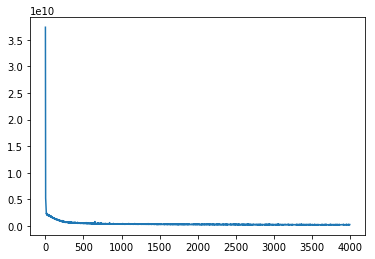

In [20]:
plt.plot(history.history['loss'])

In [21]:
model_rand = create_model()
history = model_rand.fit(X_train, y_train, epochs=3000, batch_size=32, verbose=0)

In [22]:
benchmark(model_rand)

RMSE: 30471.922435264943 
LOGRMSE: 0.14860585137588772


(30471.922435264943, 0.14860585137588772)

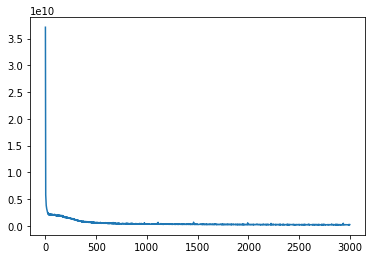

In [23]:
plt.plot(history.history['loss'])

In [24]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, n_jobs=-1)
grid_res = grid.fit(X_train, y_train)
for mean,stdev,params in zip(grid_res.cv_results_['mean_test_score'],
                           grid_res.cv_results_['std_test_score'],
                           grid_res.cv_results_['params']):
    print("mean:{} stdev:{} params:{}".format(mean,stdev,params))
print("Best score: {} Best params:{}".format(grid_res.best_score_, grid_res.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/4000
1168/1168 [==============================] - 0s 406us/step - loss: 38428024214.7945
Epoch 2/4000
1168/1168 [==============================] - 0s 31us/step - loss: 35350410730.9589
Epoch 3/4000
1168/1168 [==============================] - 0s 30us/step - loss: 25961678062.4658
Epoch 4/4000
1168/1168 [==============================] - 0s 30us/step - loss: 11988657664.0000
Epoch 5/4000
1168/1168 [==============================] - 0s 30us/step - loss: 9934063566.9041
Epoch 6/4000
1168/1168 [==============================] - 0s 31us/step - loss: 8872384273.5342
Epoch 7/4000
1168/1168 [==============================] - 0s 30us/step - loss: 7433906747.6164
Epoch 8/4000
1168/1168 [==============================] - 0s 31us/step - loss: 7473051732.1644
Epoch 9/4000
1168/1168 [==============================] - 0s 30us/step - loss: 6433566225.5342
Epoch 10/4000
1168/1168 [==============================] - 0s 30us/step - loss: 6091246085.2603
Epoch 11/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 2115032689.0959
Epoch 87/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2013118379.8356
Epoch 88/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2087716913.0959
Epoch 89/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2105268314.3014
Epoch 90/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2068014432.4384
Epoch 91/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2033384248.1096
Epoch 92/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2135084003.9452
Epoch 93/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2133521162.5205
Epoch 94/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2112195275.3973
Epoch 95/4000
1168/1168 [==============================] - 0s 30us/step - loss: 2029214959.3425
Epoch 96/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 30us/step - loss: 1931015918.4658
Epoch 171/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1911663963.1781
Epoch 172/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1876893862.5753
Epoch 173/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1934415410.8493
Epoch 174/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1880406419.2877
Epoch 175/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1934642432.0000
Epoch 176/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1974543877.2603
Epoch 177/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1924364437.0411
Epoch 178/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1915144821.4795
Epoch 179/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1849452935.0137
Epoch 180/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1700360960.0000
Epoch 255/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1796735445.9178
Epoch 256/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1727165362.8493
Epoch 257/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1852112356.8219
Epoch 258/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1823529012.6027
Epoch 259/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1782000994.1918
Epoch 260/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1662763928.5479
Epoch 261/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1780132004.8219
Epoch 262/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1717075940.8219
Epoch 263/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1750181802.0822
Epoch 264/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1699751176.7671
Epoch 339/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1644867257.8630
Epoch 340/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1579956988.4932
Epoch 341/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1641531136.0000
Epoch 342/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1558705096.3288
Epoch 343/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1607901899.3973
Epoch 344/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1618558644.6027
Epoch 345/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1548860559.3425
Epoch 346/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1484897234.4110
Epoch 347/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1617074786.1918
Epoch 348/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1421645569.7534
Epoch 423/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1472153502.6849
Epoch 424/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1393628712.3288
Epoch 425/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1452797907.2877
Epoch 426/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1486316649.2055
Epoch 427/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1397813079.6712
Epoch 428/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1459304202.5205
Epoch 429/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1429846646.3562
Epoch 430/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1489275747.9452
Epoch 431/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1376388848.2192
Epoch 432/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1251399331.0685
Epoch 507/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1285865975.2329
Epoch 508/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1338657967.3425
Epoch 509/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1243657994.5205
Epoch 510/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1285668369.5342
Epoch 511/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1322208672.4384
Epoch 512/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1313640521.6438
Epoch 513/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1368771101.8082
Epoch 514/4000
1168/1168 [==============================] - 0s 30us/step - loss: 1312293204.1644
Epoch 515/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1302046392.1096
Epoch 516/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 1396630737.0959
Epoch 591/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1367892611.5068
Epoch 592/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1220648741.4795
Epoch 593/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1167731708.4932
Epoch 594/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1129827697.9726
Epoch 595/4000
1168/1168 [==============================] - 0s 32us/step - loss: 1078606980.3836
Epoch 596/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1122130158.4658
Epoch 597/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1151327019.8356
Epoch 598/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1065509959.8904
Epoch 599/4000
1168/1168 [==============================] - 0s 31us/step - loss: 1144413795.9452
Epoch 600/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 943052683.8356
Epoch 675/4000
1168/1168 [==============================] - 0s 29us/step - loss: 1052611441.7534
Epoch 676/4000
1168/1168 [==============================] - 0s 30us/step - loss: 987756540.4932
Epoch 677/4000
1168/1168 [==============================] - 0s 29us/step - loss: 984009482.9589
Epoch 678/4000
1168/1168 [==============================] - 0s 29us/step - loss: 944418011.1781
Epoch 679/4000
1168/1168 [==============================] - 0s 30us/step - loss: 927656404.1644
Epoch 680/4000
1168/1168 [==============================] - 0s 29us/step - loss: 961118174.2466
Epoch 681/4000
1168/1168 [==============================] - 0s 29us/step - loss: 890873829.2603
Epoch 682/4000
1168/1168 [==============================] - 0s 30us/step - loss: 964749777.0959
Epoch 683/4000
1168/1168 [==============================] - 0s 30us/step - loss: 970061870.4658
Epoch 684/4000
1168/1168 [============================

1168/1168 [==============================] - 0s 29us/step - loss: 851161799.8904
Epoch 760/4000
1168/1168 [==============================] - 0s 30us/step - loss: 838765178.7397
Epoch 761/4000
1168/1168 [==============================] - 0s 30us/step - loss: 822076193.3151
Epoch 762/4000
1168/1168 [==============================] - 0s 30us/step - loss: 848256087.6712
Epoch 763/4000
1168/1168 [==============================] - 0s 30us/step - loss: 795609482.0822
Epoch 764/4000
1168/1168 [==============================] - 0s 30us/step - loss: 826961676.2740
Epoch 765/4000
1168/1168 [==============================] - 0s 30us/step - loss: 829050321.0959
Epoch 766/4000
1168/1168 [==============================] - 0s 30us/step - loss: 843492965.6986
Epoch 767/4000
1168/1168 [==============================] - 0s 30us/step - loss: 830912977.5342
Epoch 768/4000
1168/1168 [==============================] - 0s 30us/step - loss: 829930830.9041
Epoch 769/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 30us/step - loss: 792113226.5205
Epoch 845/4000
1168/1168 [==============================] - 0s 30us/step - loss: 768759137.3151
Epoch 846/4000
1168/1168 [==============================] - 0s 30us/step - loss: 724218681.8630
Epoch 847/4000
1168/1168 [==============================] - 0s 30us/step - loss: 771487776.8767
Epoch 848/4000
1168/1168 [==============================] - 0s 30us/step - loss: 964757386.5205
Epoch 849/4000
1168/1168 [==============================] - 0s 30us/step - loss: 893690702.0274
Epoch 850/4000
1168/1168 [==============================] - 0s 30us/step - loss: 748348558.9041
Epoch 851/4000
1168/1168 [==============================] - 0s 30us/step - loss: 788418053.2603
Epoch 852/4000
1168/1168 [==============================] - 0s 30us/step - loss: 714022161.5342
Epoch 853/4000
1168/1168 [==============================] - 0s 30us/step - loss: 756192810.0822
Epoch 854/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 30us/step - loss: 716874515.2877
Epoch 930/4000
1168/1168 [==============================] - 0s 30us/step - loss: 839065064.5479
Epoch 931/4000
1168/1168 [==============================] - 0s 29us/step - loss: 629931755.3973
Epoch 932/4000
1168/1168 [==============================] - 0s 29us/step - loss: 631647749.2603
Epoch 933/4000
1168/1168 [==============================] - 0s 29us/step - loss: 657547613.3699
Epoch 934/4000
1168/1168 [==============================] - 0s 30us/step - loss: 645239738.7397
Epoch 935/4000
1168/1168 [==============================] - 0s 29us/step - loss: 637684686.0274
Epoch 936/4000
1168/1168 [==============================] - 0s 30us/step - loss: 628592085.4795
Epoch 937/4000
1168/1168 [==============================] - 0s 30us/step - loss: 710614435.0685
Epoch 938/4000
1168/1168 [==============================] - 0s 30us/step - loss: 676885293.5890
Epoch 939/4000
1168/1168 [=============================

1168/1168 [==============================] - 0s 29us/step - loss: 615993719.2329
Epoch 1015/4000
1168/1168 [==============================] - 0s 30us/step - loss: 612531600.2192
Epoch 1016/4000
1168/1168 [==============================] - 0s 30us/step - loss: 634585048.5479
Epoch 1017/4000
1168/1168 [==============================] - 0s 30us/step - loss: 653003722.5205
Epoch 1018/4000
1168/1168 [==============================] - 0s 30us/step - loss: 681983519.5616
Epoch 1019/4000
1168/1168 [==============================] - 0s 30us/step - loss: 632099262.6849
Epoch 1020/4000
1168/1168 [==============================] - 0s 30us/step - loss: 735562925.5890
Epoch 1021/4000
1168/1168 [==============================] - 0s 30us/step - loss: 881988732.0548
Epoch 1022/4000
1168/1168 [==============================] - 0s 30us/step - loss: 708261602.1918
Epoch 1023/4000
1168/1168 [==============================] - 0s 30us/step - loss: 643257252.8219
Epoch 1024/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 668428461.5890
Epoch 1099/4000
1168/1168 [==============================] - 0s 30us/step - loss: 685402663.4521
Epoch 1100/4000
1168/1168 [==============================] - 0s 32us/step - loss: 587376362.9589
Epoch 1101/4000
1168/1168 [==============================] - 0s 30us/step - loss: 637234286.9041
Epoch 1102/4000
1168/1168 [==============================] - 0s 30us/step - loss: 554414658.6301
Epoch 1103/4000
1168/1168 [==============================] - 0s 29us/step - loss: 610555382.5753
Epoch 1104/4000
1168/1168 [==============================] - 0s 29us/step - loss: 553833597.3699
Epoch 1105/4000
1168/1168 [==============================] - 0s 30us/step - loss: 541411175.6712
Epoch 1106/4000
1168/1168 [==============================] - 0s 30us/step - loss: 692854240.4384
Epoch 1107/4000
1168/1168 [==============================] - 0s 30us/step - loss: 548321730.1918
Epoch 1108/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 606224309.4795
Epoch 1183/4000
1168/1168 [==============================] - 0s 30us/step - loss: 633910484.1644
Epoch 1184/4000
1168/1168 [==============================] - 0s 29us/step - loss: 541724696.5479
Epoch 1185/4000
1168/1168 [==============================] - 0s 29us/step - loss: 516823171.9452
Epoch 1186/4000
1168/1168 [==============================] - 0s 30us/step - loss: 493355406.0274
Epoch 1187/4000
1168/1168 [==============================] - 0s 30us/step - loss: 555416400.6575
Epoch 1188/4000
1168/1168 [==============================] - 0s 30us/step - loss: 494697522.8493
Epoch 1189/4000
1168/1168 [==============================] - 0s 29us/step - loss: 597447407.3425
Epoch 1190/4000
1168/1168 [==============================] - 0s 29us/step - loss: 525665057.7534
Epoch 1191/4000
1168/1168 [==============================] - 0s 30us/step - loss: 513584517.6986
Epoch 1192/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 621495879.8904
Epoch 1267/4000
1168/1168 [==============================] - 0s 30us/step - loss: 602350544.2192
Epoch 1268/4000
1168/1168 [==============================] - 0s 30us/step - loss: 558741830.1370
Epoch 1269/4000
1168/1168 [==============================] - 0s 30us/step - loss: 546311838.6849
Epoch 1270/4000
1168/1168 [==============================] - 0s 31us/step - loss: 502546158.4658
Epoch 1271/4000
1168/1168 [==============================] - 0s 30us/step - loss: 522349428.6027
Epoch 1272/4000
1168/1168 [==============================] - 0s 30us/step - loss: 484414343.8904
Epoch 1273/4000
1168/1168 [==============================] - 0s 30us/step - loss: 496616017.9726
Epoch 1274/4000
1168/1168 [==============================] - 0s 32us/step - loss: 464728508.7123
Epoch 1275/4000
1168/1168 [==============================] - 0s 30us/step - loss: 452076814.9041
Epoch 1276/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 33us/step - loss: 464592024.9863
Epoch 1351/4000
1168/1168 [==============================] - 0s 30us/step - loss: 487354561.7534
Epoch 1352/4000
1168/1168 [==============================] - 0s 30us/step - loss: 531522078.6849
Epoch 1353/4000
1168/1168 [==============================] - 0s 29us/step - loss: 452622560.8767
Epoch 1354/4000
1168/1168 [==============================] - 0s 30us/step - loss: 512825560.5479
Epoch 1355/4000
1168/1168 [==============================] - 0s 30us/step - loss: 461434064.2192
Epoch 1356/4000
1168/1168 [==============================] - 0s 30us/step - loss: 454424677.9178
Epoch 1357/4000
1168/1168 [==============================] - 0s 30us/step - loss: 490510771.2877
Epoch 1358/4000
1168/1168 [==============================] - 0s 30us/step - loss: 499181846.7945
Epoch 1359/4000
1168/1168 [==============================] - 0s 30us/step - loss: 438184266.5205
Epoch 1360/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 414666691.5068
Epoch 1435/4000
1168/1168 [==============================] - 0s 30us/step - loss: 414151114.5205
Epoch 1436/4000
1168/1168 [==============================] - 0s 30us/step - loss: 435627434.0822
Epoch 1437/4000
1168/1168 [==============================] - 0s 30us/step - loss: 419909732.8219
Epoch 1438/4000
1168/1168 [==============================] - 0s 30us/step - loss: 445227782.1370
Epoch 1439/4000
1168/1168 [==============================] - 0s 30us/step - loss: 416675366.5753
Epoch 1440/4000
1168/1168 [==============================] - 0s 30us/step - loss: 408346260.1644
Epoch 1441/4000
1168/1168 [==============================] - 0s 29us/step - loss: 409770635.8356
Epoch 1442/4000
1168/1168 [==============================] - 0s 29us/step - loss: 436740641.3151
Epoch 1443/4000
1168/1168 [==============================] - 0s 29us/step - loss: 455441146.5205
Epoch 1444/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 479623177.6438
Epoch 1519/4000
1168/1168 [==============================] - 0s 30us/step - loss: 444074950.1370
Epoch 1520/4000
1168/1168 [==============================] - 0s 30us/step - loss: 424483904.0000
Epoch 1521/4000
1168/1168 [==============================] - 0s 30us/step - loss: 448777158.1370
Epoch 1522/4000
1168/1168 [==============================] - 0s 30us/step - loss: 482030026.5205
Epoch 1523/4000
1168/1168 [==============================] - 0s 30us/step - loss: 436242878.6849
Epoch 1524/4000
1168/1168 [==============================] - 0s 29us/step - loss: 501866645.9178
Epoch 1525/4000
1168/1168 [==============================] - 0s 30us/step - loss: 492127346.8493
Epoch 1526/4000
1168/1168 [==============================] - 0s 30us/step - loss: 406350244.8219
Epoch 1527/4000
1168/1168 [==============================] - 0s 30us/step - loss: 412261567.1233
Epoch 1528/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 399812392.3288
Epoch 1603/4000
1168/1168 [==============================] - 0s 30us/step - loss: 408213624.1096
Epoch 1604/4000
1168/1168 [==============================] - 0s 30us/step - loss: 390781495.2329
Epoch 1605/4000
1168/1168 [==============================] - 0s 30us/step - loss: 449296019.7260
Epoch 1606/4000
1168/1168 [==============================] - 0s 30us/step - loss: 429742003.2877
Epoch 1607/4000
1168/1168 [==============================] - 0s 30us/step - loss: 425309559.0137
Epoch 1608/4000
1168/1168 [==============================] - 0s 30us/step - loss: 388423563.3973
Epoch 1609/4000
1168/1168 [==============================] - 0s 29us/step - loss: 416284229.2603
Epoch 1610/4000
1168/1168 [==============================] - 0s 29us/step - loss: 487293583.7808
Epoch 1611/4000
1168/1168 [==============================] - 0s 29us/step - loss: 385706562.1918
Epoch 1612/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 491881575.4521
Epoch 1687/4000
1168/1168 [==============================] - 0s 30us/step - loss: 430611015.2329
Epoch 1688/4000
1168/1168 [==============================] - 0s 30us/step - loss: 438662682.3014
Epoch 1689/4000
1168/1168 [==============================] - 0s 30us/step - loss: 424388835.7260
Epoch 1690/4000
1168/1168 [==============================] - 0s 29us/step - loss: 412176970.5205
Epoch 1691/4000
1168/1168 [==============================] - 0s 30us/step - loss: 444611358.6849
Epoch 1692/4000
1168/1168 [==============================] - 0s 30us/step - loss: 377627185.0959
Epoch 1693/4000
1168/1168 [==============================] - 0s 30us/step - loss: 418493827.5068
Epoch 1694/4000
1168/1168 [==============================] - 0s 30us/step - loss: 410393681.7534
Epoch 1695/4000
1168/1168 [==============================] - 0s 29us/step - loss: 455404767.5616
Epoch 1696/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 375135474.8493
Epoch 1771/4000
1168/1168 [==============================] - 0s 30us/step - loss: 386454709.9178
Epoch 1772/4000
1168/1168 [==============================] - 0s 30us/step - loss: 377886935.6712
Epoch 1773/4000
1168/1168 [==============================] - 0s 30us/step - loss: 405953348.1644
Epoch 1774/4000
1168/1168 [==============================] - 0s 30us/step - loss: 397431050.0822
Epoch 1775/4000
1168/1168 [==============================] - 0s 29us/step - loss: 382119185.5342
Epoch 1776/4000
1168/1168 [==============================] - 0s 29us/step - loss: 368219264.8767
Epoch 1777/4000
1168/1168 [==============================] - 0s 30us/step - loss: 488752149.0411
Epoch 1778/4000
1168/1168 [==============================] - 0s 30us/step - loss: 404774051.9452
Epoch 1779/4000
1168/1168 [==============================] - 0s 30us/step - loss: 402802821.6986
Epoch 1780/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 406752382.2466
Epoch 1855/4000
1168/1168 [==============================] - 0s 30us/step - loss: 410039638.7945
Epoch 1856/4000
1168/1168 [==============================] - 0s 29us/step - loss: 375284292.3836
Epoch 1857/4000
1168/1168 [==============================] - 0s 29us/step - loss: 384626368.0000
Epoch 1858/4000
1168/1168 [==============================] - 0s 30us/step - loss: 427056468.1644
Epoch 1859/4000
1168/1168 [==============================] - 0s 30us/step - loss: 383463226.3014
Epoch 1860/4000
1168/1168 [==============================] - 0s 30us/step - loss: 368415857.9726
Epoch 1861/4000
1168/1168 [==============================] - 0s 30us/step - loss: 373948186.3014
Epoch 1862/4000
1168/1168 [==============================] - 0s 30us/step - loss: 369251784.7671
Epoch 1863/4000
1168/1168 [==============================] - 0s 29us/step - loss: 490161849.8630
Epoch 1864/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 348678095.1233
Epoch 1939/4000
1168/1168 [==============================] - 0s 30us/step - loss: 378457248.8767
Epoch 1940/4000
1168/1168 [==============================] - 0s 30us/step - loss: 401486818.6301
Epoch 1941/4000
1168/1168 [==============================] - 0s 29us/step - loss: 357110814.9041
Epoch 1942/4000
1168/1168 [==============================] - 0s 30us/step - loss: 393722275.9452
Epoch 1943/4000
1168/1168 [==============================] - 0s 30us/step - loss: 407742884.8219
Epoch 1944/4000
1168/1168 [==============================] - 0s 29us/step - loss: 412680293.6986
Epoch 1945/4000
1168/1168 [==============================] - 0s 29us/step - loss: 429107029.0411
Epoch 1946/4000
1168/1168 [==============================] - 0s 29us/step - loss: 365927097.8630
Epoch 1947/4000
1168/1168 [==============================] - 0s 30us/step - loss: 352063201.7534
Epoch 1948/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 344408619.8356
Epoch 2023/4000
1168/1168 [==============================] - 0s 30us/step - loss: 358529772.7123
Epoch 2024/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348686442.9589
Epoch 2025/4000
1168/1168 [==============================] - 0s 30us/step - loss: 340857986.1918
Epoch 2026/4000
1168/1168 [==============================] - 0s 29us/step - loss: 373187004.0548
Epoch 2027/4000
1168/1168 [==============================] - 0s 30us/step - loss: 363366950.5753
Epoch 2028/4000
1168/1168 [==============================] - 0s 30us/step - loss: 373727465.6438
Epoch 2029/4000
1168/1168 [==============================] - 0s 30us/step - loss: 356087857.9726
Epoch 2030/4000
1168/1168 [==============================] - 0s 29us/step - loss: 400997628.4932
Epoch 2031/4000
1168/1168 [==============================] - 0s 30us/step - loss: 446453850.3014
Epoch 2032/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 336732256.0000
Epoch 2107/4000
1168/1168 [==============================] - 0s 30us/step - loss: 346364870.1370
Epoch 2108/4000
1168/1168 [==============================] - 0s 29us/step - loss: 371938868.6027
Epoch 2109/4000
1168/1168 [==============================] - 0s 29us/step - loss: 371100951.6712
Epoch 2110/4000
1168/1168 [==============================] - 0s 29us/step - loss: 349222569.6438
Epoch 2111/4000
1168/1168 [==============================] - 0s 29us/step - loss: 456772245.0411
Epoch 2112/4000
1168/1168 [==============================] - 0s 29us/step - loss: 410677041.9726
Epoch 2113/4000
1168/1168 [==============================] - 0s 29us/step - loss: 476850282.9589
Epoch 2114/4000
1168/1168 [==============================] - 0s 28us/step - loss: 434842759.0137
Epoch 2115/4000
1168/1168 [==============================] - 0s 29us/step - loss: 445443718.1370
Epoch 2116/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 343535713.3151
Epoch 2191/4000
1168/1168 [==============================] - 0s 28us/step - loss: 333773481.2055
Epoch 2192/4000
1168/1168 [==============================] - 0s 29us/step - loss: 370492657.9726
Epoch 2193/4000
1168/1168 [==============================] - 0s 29us/step - loss: 369114743.2329
Epoch 2194/4000
1168/1168 [==============================] - 0s 29us/step - loss: 379098759.8904
Epoch 2195/4000
1168/1168 [==============================] - 0s 30us/step - loss: 392991361.7534
Epoch 2196/4000
1168/1168 [==============================] - 0s 29us/step - loss: 362625795.9452
Epoch 2197/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348924702.2466
Epoch 2198/4000
1168/1168 [==============================] - 0s 29us/step - loss: 339882552.5479
Epoch 2199/4000
1168/1168 [==============================] - 0s 29us/step - loss: 352106159.5616
Epoch 2200/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 332807897.4247
Epoch 2275/4000
1168/1168 [==============================] - 0s 29us/step - loss: 321161906.8493
Epoch 2276/4000
1168/1168 [==============================] - 0s 30us/step - loss: 337745533.8082
Epoch 2277/4000
1168/1168 [==============================] - 0s 29us/step - loss: 339865767.8904
Epoch 2278/4000
1168/1168 [==============================] - 0s 30us/step - loss: 345636317.3699
Epoch 2279/4000
1168/1168 [==============================] - 0s 29us/step - loss: 353968283.1781
Epoch 2280/4000
1168/1168 [==============================] - 0s 29us/step - loss: 388342001.0959
Epoch 2281/4000
1168/1168 [==============================] - 0s 29us/step - loss: 351251933.8082
Epoch 2282/4000
1168/1168 [==============================] - 0s 30us/step - loss: 354836613.2603
Epoch 2283/4000
1168/1168 [==============================] - 0s 30us/step - loss: 467482691.9452
Epoch 2284/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 31us/step - loss: 356833559.6712
Epoch 2359/4000
1168/1168 [==============================] - 0s 30us/step - loss: 352104547.9452
Epoch 2360/4000
1168/1168 [==============================] - 0s 31us/step - loss: 331816513.7534
Epoch 2361/4000
1168/1168 [==============================] - 0s 31us/step - loss: 331333128.3288
Epoch 2362/4000
1168/1168 [==============================] - 0s 31us/step - loss: 319726021.2603
Epoch 2363/4000
1168/1168 [==============================] - 0s 31us/step - loss: 356159901.8082
Epoch 2364/4000
1168/1168 [==============================] - 0s 31us/step - loss: 350913750.7945
Epoch 2365/4000
1168/1168 [==============================] - 0s 30us/step - loss: 347192849.0959
Epoch 2366/4000
1168/1168 [==============================] - 0s 30us/step - loss: 337012298.0822
Epoch 2367/4000
1168/1168 [==============================] - 0s 30us/step - loss: 353300275.7260
Epoch 2368/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 550705428.1644
Epoch 2443/4000
1168/1168 [==============================] - 0s 29us/step - loss: 448637049.4247
Epoch 2444/4000
1168/1168 [==============================] - 0s 30us/step - loss: 355177551.3425
Epoch 2445/4000
1168/1168 [==============================] - 0s 29us/step - loss: 350024545.3151
Epoch 2446/4000
1168/1168 [==============================] - 0s 29us/step - loss: 343318266.7397
Epoch 2447/4000
1168/1168 [==============================] - 0s 29us/step - loss: 330284798.4658
Epoch 2448/4000
1168/1168 [==============================] - 0s 29us/step - loss: 325033510.5753
Epoch 2449/4000
1168/1168 [==============================] - 0s 30us/step - loss: 337812781.5890
Epoch 2450/4000
1168/1168 [==============================] - 0s 30us/step - loss: 356042400.2192
Epoch 2451/4000
1168/1168 [==============================] - 0s 30us/step - loss: 342550838.3562
Epoch 2452/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 325639550.2466
Epoch 2527/4000
1168/1168 [==============================] - 0s 30us/step - loss: 353060775.4521
Epoch 2528/4000
1168/1168 [==============================] - 0s 30us/step - loss: 387167678.9041
Epoch 2529/4000
1168/1168 [==============================] - 0s 30us/step - loss: 355953720.1096
Epoch 2530/4000
1168/1168 [==============================] - 0s 30us/step - loss: 339451515.1781
Epoch 2531/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348720795.1781
Epoch 2532/4000
1168/1168 [==============================] - 0s 30us/step - loss: 316882830.6849
Epoch 2533/4000
1168/1168 [==============================] - 0s 30us/step - loss: 327119677.8082
Epoch 2534/4000
1168/1168 [==============================] - 0s 32us/step - loss: 360892113.9726
Epoch 2535/4000
1168/1168 [==============================] - 0s 30us/step - loss: 339664643.0685
Epoch 2536/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 306999471.3425
Epoch 2611/4000
1168/1168 [==============================] - 0s 30us/step - loss: 355406267.6164
Epoch 2612/4000
1168/1168 [==============================] - 0s 30us/step - loss: 382940331.8356
Epoch 2613/4000
1168/1168 [==============================] - 0s 30us/step - loss: 380048175.3425
Epoch 2614/4000
1168/1168 [==============================] - 0s 29us/step - loss: 370408248.1096
Epoch 2615/4000
1168/1168 [==============================] - 0s 30us/step - loss: 390367501.1507
Epoch 2616/4000
1168/1168 [==============================] - 0s 30us/step - loss: 327744506.7397
Epoch 2617/4000
1168/1168 [==============================] - 0s 30us/step - loss: 320958573.8082
Epoch 2618/4000
1168/1168 [==============================] - 0s 30us/step - loss: 367975267.0685
Epoch 2619/4000
1168/1168 [==============================] - 0s 30us/step - loss: 326661198.9041
Epoch 2620/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 351470912.8767
Epoch 2695/4000
1168/1168 [==============================] - 0s 30us/step - loss: 322137786.7397
Epoch 2696/4000
1168/1168 [==============================] - 0s 31us/step - loss: 332262022.1370
Epoch 2697/4000
1168/1168 [==============================] - 0s 30us/step - loss: 306338452.6027
Epoch 2698/4000
1168/1168 [==============================] - 0s 31us/step - loss: 336173418.0822
Epoch 2699/4000
1168/1168 [==============================] - 0s 31us/step - loss: 377397203.7260
Epoch 2700/4000
1168/1168 [==============================] - 0s 30us/step - loss: 348262640.2192
Epoch 2701/4000
1168/1168 [==============================] - 0s 31us/step - loss: 337841408.8767
Epoch 2702/4000
1168/1168 [==============================] - 0s 30us/step - loss: 315531456.8767
Epoch 2703/4000
1168/1168 [==============================] - 0s 30us/step - loss: 328831313.2055
Epoch 2704/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 325452487.0137
Epoch 2779/4000
1168/1168 [==============================] - 0s 30us/step - loss: 332017875.2877
Epoch 2780/4000
1168/1168 [==============================] - 0s 30us/step - loss: 347493114.7397
Epoch 2781/4000
1168/1168 [==============================] - 0s 30us/step - loss: 318858396.7123
Epoch 2782/4000
1168/1168 [==============================] - 0s 30us/step - loss: 318069575.4521
Epoch 2783/4000
1168/1168 [==============================] - 0s 30us/step - loss: 334077637.2603
Epoch 2784/4000
1168/1168 [==============================] - 0s 30us/step - loss: 312007952.2192
Epoch 2785/4000
1168/1168 [==============================] - 0s 30us/step - loss: 324871656.3288
Epoch 2786/4000
1168/1168 [==============================] - 0s 30us/step - loss: 321511637.4795
Epoch 2787/4000
1168/1168 [==============================] - 0s 29us/step - loss: 330401555.2877
Epoch 2788/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 380413928.3288
Epoch 2863/4000
1168/1168 [==============================] - 0s 30us/step - loss: 375870372.8219
Epoch 2864/4000
1168/1168 [==============================] - 0s 29us/step - loss: 370272637.5890
Epoch 2865/4000
1168/1168 [==============================] - 0s 32us/step - loss: 373740207.7808
Epoch 2866/4000
1168/1168 [==============================] - 0s 29us/step - loss: 327164311.0137
Epoch 2867/4000
1168/1168 [==============================] - 0s 29us/step - loss: 328891443.7260
Epoch 2868/4000
1168/1168 [==============================] - 0s 29us/step - loss: 329906325.9178
Epoch 2869/4000
1168/1168 [==============================] - 0s 29us/step - loss: 316367421.8082
Epoch 2870/4000
1168/1168 [==============================] - 0s 29us/step - loss: 321743657.6438
Epoch 2871/4000
1168/1168 [==============================] - 0s 30us/step - loss: 342110972.9315
Epoch 2872/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 327076913.0959
Epoch 2947/4000
1168/1168 [==============================] - 0s 29us/step - loss: 307892033.6438
Epoch 2948/4000
1168/1168 [==============================] - 0s 30us/step - loss: 377012880.2192
Epoch 2949/4000
1168/1168 [==============================] - 0s 30us/step - loss: 330132464.2192
Epoch 2950/4000
1168/1168 [==============================] - 0s 30us/step - loss: 347950378.9589
Epoch 2951/4000
1168/1168 [==============================] - 0s 30us/step - loss: 327132266.0822
Epoch 2952/4000
1168/1168 [==============================] - 0s 30us/step - loss: 306103857.5342
Epoch 2953/4000
1168/1168 [==============================] - 0s 30us/step - loss: 316508170.5205
Epoch 2954/4000
1168/1168 [==============================] - 0s 30us/step - loss: 317196055.0137
Epoch 2955/4000
1168/1168 [==============================] - 0s 30us/step - loss: 333395607.6712
Epoch 2956/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 362408206.4658
Epoch 3031/4000
1168/1168 [==============================] - 0s 30us/step - loss: 356482339.9452
Epoch 3032/4000
1168/1168 [==============================] - 0s 29us/step - loss: 328236549.0411
Epoch 3033/4000
1168/1168 [==============================] - 0s 30us/step - loss: 298382359.6712
Epoch 3034/4000
1168/1168 [==============================] - 0s 30us/step - loss: 299712008.3288
Epoch 3035/4000
1168/1168 [==============================] - 0s 30us/step - loss: 316172070.1370
Epoch 3036/4000
1168/1168 [==============================] - 0s 30us/step - loss: 308389458.8493
Epoch 3037/4000
1168/1168 [==============================] - 0s 30us/step - loss: 311625094.4658
Epoch 3038/4000
1168/1168 [==============================] - 0s 30us/step - loss: 306658988.7123
Epoch 3039/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307698424.1096
Epoch 3040/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 290010259.2877
Epoch 3115/4000
1168/1168 [==============================] - 0s 30us/step - loss: 297456062.2466
Epoch 3116/4000
1168/1168 [==============================] - 0s 32us/step - loss: 319045603.5068
Epoch 3117/4000
1168/1168 [==============================] - 0s 30us/step - loss: 313710126.9041
Epoch 3118/4000
1168/1168 [==============================] - 0s 30us/step - loss: 364912892.4932
Epoch 3119/4000
1168/1168 [==============================] - 0s 30us/step - loss: 330154317.5890
Epoch 3120/4000
1168/1168 [==============================] - 0s 29us/step - loss: 404784369.9726
Epoch 3121/4000
1168/1168 [==============================] - 0s 30us/step - loss: 302375857.9726
Epoch 3122/4000
1168/1168 [==============================] - 0s 30us/step - loss: 330753436.9315
Epoch 3123/4000
1168/1168 [==============================] - 0s 30us/step - loss: 374579582.2466
Epoch 3124/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 335761005.5890
Epoch 3199/4000
1168/1168 [==============================] - 0s 29us/step - loss: 312120745.2055
Epoch 3200/4000
1168/1168 [==============================] - 0s 29us/step - loss: 343920505.8630
Epoch 3201/4000
1168/1168 [==============================] - 0s 29us/step - loss: 309543272.5479
Epoch 3202/4000
1168/1168 [==============================] - 0s 30us/step - loss: 320100589.5890
Epoch 3203/4000
1168/1168 [==============================] - 0s 29us/step - loss: 314351727.3425
Epoch 3204/4000
1168/1168 [==============================] - 0s 29us/step - loss: 323357987.9452
Epoch 3205/4000
1168/1168 [==============================] - 0s 29us/step - loss: 324664781.5890
Epoch 3206/4000
1168/1168 [==============================] - 0s 29us/step - loss: 296886666.0822
Epoch 3207/4000
1168/1168 [==============================] - 0s 29us/step - loss: 315428898.1918
Epoch 3208/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 319040102.0274
Epoch 3283/4000
1168/1168 [==============================] - 0s 29us/step - loss: 381768008.7671
Epoch 3284/4000
1168/1168 [==============================] - 0s 29us/step - loss: 305965814.3562
Epoch 3285/4000
1168/1168 [==============================] - 0s 29us/step - loss: 340733091.9452
Epoch 3286/4000
1168/1168 [==============================] - 0s 29us/step - loss: 328922654.9041
Epoch 3287/4000
1168/1168 [==============================] - 0s 29us/step - loss: 307746765.3699
Epoch 3288/4000
1168/1168 [==============================] - 0s 29us/step - loss: 297089879.2329
Epoch 3289/4000
1168/1168 [==============================] - 0s 29us/step - loss: 311497445.6986
Epoch 3290/4000
1168/1168 [==============================] - 0s 29us/step - loss: 320850775.0137
Epoch 3291/4000
1168/1168 [==============================] - 0s 29us/step - loss: 303524357.6986
Epoch 3292/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 347539927.6712
Epoch 3367/4000
1168/1168 [==============================] - 0s 32us/step - loss: 342864620.2740
Epoch 3368/4000
1168/1168 [==============================] - 0s 29us/step - loss: 343569938.4110
Epoch 3369/4000
1168/1168 [==============================] - 0s 33us/step - loss: 311102429.8082
Epoch 3370/4000
1168/1168 [==============================] - 0s 30us/step - loss: 319782365.8082
Epoch 3371/4000
1168/1168 [==============================] - 0s 30us/step - loss: 285369821.8082
Epoch 3372/4000
1168/1168 [==============================] - 0s 30us/step - loss: 314470369.3151
Epoch 3373/4000
1168/1168 [==============================] - 0s 29us/step - loss: 287407627.8356
Epoch 3374/4000
1168/1168 [==============================] - 0s 29us/step - loss: 285983259.6164
Epoch 3375/4000
1168/1168 [==============================] - 0s 29us/step - loss: 332385280.8767
Epoch 3376/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 304051866.3014
Epoch 3451/4000
1168/1168 [==============================] - 0s 30us/step - loss: 306765913.4247
Epoch 3452/4000
1168/1168 [==============================] - 0s 30us/step - loss: 311007285.4795
Epoch 3453/4000
1168/1168 [==============================] - 0s 30us/step - loss: 316236003.9452
Epoch 3454/4000
1168/1168 [==============================] - 0s 30us/step - loss: 329232632.1096
Epoch 3455/4000
1168/1168 [==============================] - 0s 31us/step - loss: 299271831.8904
Epoch 3456/4000
1168/1168 [==============================] - 0s 32us/step - loss: 336214053.2603
Epoch 3457/4000
1168/1168 [==============================] - 0s 30us/step - loss: 308652855.6712
Epoch 3458/4000
1168/1168 [==============================] - 0s 30us/step - loss: 312019003.6164
Epoch 3459/4000
1168/1168 [==============================] - 0s 31us/step - loss: 296516310.7945
Epoch 3460/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 304412422.7945
Epoch 3535/4000
1168/1168 [==============================] - 0s 30us/step - loss: 294282344.3288
Epoch 3536/4000
1168/1168 [==============================] - 0s 29us/step - loss: 301626061.4795
Epoch 3537/4000
1168/1168 [==============================] - 0s 30us/step - loss: 321414516.6027
Epoch 3538/4000
1168/1168 [==============================] - 0s 30us/step - loss: 272933127.0137
Epoch 3539/4000
1168/1168 [==============================] - 0s 30us/step - loss: 296232557.2603
Epoch 3540/4000
1168/1168 [==============================] - 0s 30us/step - loss: 327765759.5616
Epoch 3541/4000
1168/1168 [==============================] - 0s 30us/step - loss: 413169319.4521
Epoch 3542/4000
1168/1168 [==============================] - 0s 29us/step - loss: 293313965.1507
Epoch 3543/4000
1168/1168 [==============================] - 0s 30us/step - loss: 329100211.5068
Epoch 3544/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 310522622.6849
Epoch 3619/4000
1168/1168 [==============================] - 0s 31us/step - loss: 297670849.3151
Epoch 3620/4000
1168/1168 [==============================] - 0s 31us/step - loss: 368877499.1781
Epoch 3621/4000
1168/1168 [==============================] - 0s 30us/step - loss: 302026536.9863
Epoch 3622/4000
1168/1168 [==============================] - 0s 30us/step - loss: 337501332.6027
Epoch 3623/4000
1168/1168 [==============================] - 0s 30us/step - loss: 296699559.0137
Epoch 3624/4000
1168/1168 [==============================] - 0s 30us/step - loss: 282891541.6986
Epoch 3625/4000
1168/1168 [==============================] - 0s 30us/step - loss: 300996790.3562
Epoch 3626/4000
1168/1168 [==============================] - 0s 30us/step - loss: 331959963.1781
Epoch 3627/4000
1168/1168 [==============================] - 0s 30us/step - loss: 300928028.4932
Epoch 3628/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 290692566.7945
Epoch 3703/4000
1168/1168 [==============================] - 0s 29us/step - loss: 292971781.2603
Epoch 3704/4000
1168/1168 [==============================] - 0s 30us/step - loss: 312600808.3288
Epoch 3705/4000
1168/1168 [==============================] - 0s 30us/step - loss: 295053770.9589
Epoch 3706/4000
1168/1168 [==============================] - 0s 30us/step - loss: 280372780.7123
Epoch 3707/4000
1168/1168 [==============================] - 0s 30us/step - loss: 323503451.1781
Epoch 3708/4000
1168/1168 [==============================] - 0s 29us/step - loss: 327692735.1233
Epoch 3709/4000
1168/1168 [==============================] - 0s 31us/step - loss: 309031332.9315
Epoch 3710/4000
1168/1168 [==============================] - 0s 31us/step - loss: 305595128.9863
Epoch 3711/4000
1168/1168 [==============================] - 0s 30us/step - loss: 329504966.3562
Epoch 3712/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 310606288.6575
Epoch 3787/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307673545.6438
Epoch 3788/4000
1168/1168 [==============================] - 0s 30us/step - loss: 294234097.0959
Epoch 3789/4000
1168/1168 [==============================] - 0s 30us/step - loss: 310616910.9041
Epoch 3790/4000
1168/1168 [==============================] - 0s 30us/step - loss: 326122069.6986
Epoch 3791/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307184192.4384
Epoch 3792/4000
1168/1168 [==============================] - 0s 34us/step - loss: 285611635.0685
Epoch 3793/4000
1168/1168 [==============================] - 0s 30us/step - loss: 294729253.0411
Epoch 3794/4000
1168/1168 [==============================] - 0s 30us/step - loss: 308170540.7123
Epoch 3795/4000
1168/1168 [==============================] - 0s 30us/step - loss: 332639842.1918
Epoch 3796/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 30us/step - loss: 316888138.5205
Epoch 3871/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307880371.7260
Epoch 3872/4000
1168/1168 [==============================] - 0s 30us/step - loss: 278467035.6164
Epoch 3873/4000
1168/1168 [==============================] - 0s 29us/step - loss: 299479530.9589
Epoch 3874/4000
1168/1168 [==============================] - 0s 30us/step - loss: 292771937.3151
Epoch 3875/4000
1168/1168 [==============================] - 0s 30us/step - loss: 278755370.9589
Epoch 3876/4000
1168/1168 [==============================] - 0s 30us/step - loss: 275593707.3973
Epoch 3877/4000
1168/1168 [==============================] - 0s 31us/step - loss: 314161111.2329
Epoch 3878/4000
1168/1168 [==============================] - 0s 31us/step - loss: 285552850.4110
Epoch 3879/4000
1168/1168 [==============================] - 0s 30us/step - loss: 303571685.2603
Epoch 3880/4000
1168/1168 [===================

1168/1168 [==============================] - 0s 29us/step - loss: 330616300.7123
Epoch 3955/4000
1168/1168 [==============================] - 0s 30us/step - loss: 391989396.1644
Epoch 3956/4000
1168/1168 [==============================] - 0s 30us/step - loss: 307656585.2055
Epoch 3957/4000
1168/1168 [==============================] - 0s 30us/step - loss: 296405177.4247
Epoch 3958/4000
1168/1168 [==============================] - 0s 30us/step - loss: 290005859.0685
Epoch 3959/4000
1168/1168 [==============================] - 0s 30us/step - loss: 294879425.3151
Epoch 3960/4000
1168/1168 [==============================] - 0s 30us/step - loss: 317758293.9178
Epoch 3961/4000
1168/1168 [==============================] - 0s 30us/step - loss: 292592004.3836
Epoch 3962/4000
1168/1168 [==============================] - 0s 30us/step - loss: 284658602.9589
Epoch 3963/4000
1168/1168 [==============================] - 0s 30us/step - loss: 302672554.9589
Epoch 3964/4000
1168/1168 [===================

In [26]:
#Best score: -1229757790.4383562 Best params:{'batch_size': 64, 'epochs': 4000}
model_grid = create_model()

In [27]:
history = model_grid.fit(X_train, y_train, epochs=3000, batch_size=64, verbose=0)

In [29]:
benchmark(model_grid)

RMSE: 29228.664240847396 
LOGRMSE: 0.12854169302909504


(29228.664240847396, 0.12854169302909504)

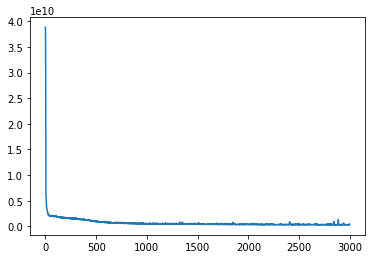

In [30]:
plt.plot(history.history['loss'])

In [35]:
y_log_train = y_train.copy()
y_log_train = np.log(y_train)

In [36]:
batch_size = [16, 32, 48, 64, 80, 96]
epochs = [100, 500, 1000, 1500, 2000, 2500, 3000]

param_grid = dict(batch_size=batch_size,epochs=epochs)
rscv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, verbose=0, n_jobs=-1,random_state=123)
result = rscv.fit(X_train, y_log_train)
for mean,stdev,param in zip(result.cv_results_['mean_test_score'],
                           result.cv_results_['std_test_score'],
                           result.cv_results_['params']):
    print("mean:{} stdev:{} param:{}".format(mean,stdev,param))
print("Best score: {} Best param:{}".format(result.best_score_, result.best_params_))

/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/2500
1168/1168 [==============================] - 1s 576us/step - loss: 10653.2559
Epoch 2/2500
1168/1168 [==============================] - 0s 87us/step - loss: 1901.9065
Epoch 3/2500
1168/1168 [==============================] - 0s 87us/step - loss: 1179.4433
Epoch 4/2500
1168/1168 [==============================] - 0s 88us/step - loss: 1577.5059
Epoch 5/2500
1168/1168 [==============================] - 0s 84us/step - loss: 492.3338
Epoch 6/2500
1168/1168 [==============================] - 0s 86us/step - loss: 604.1790
Epoch 7/2500
1168/1168 [==============================] - 0s 86us/step - loss: 62.0339
Epoch 8/2500
1168/1168 [==============================] - 0s 87us/step - loss: 49.2297
Epoch 9/2500
1168/1168 [==============================] - 0s 86us/step - loss: 23.0852
Epoch 10/2500
1168/1168 [==============================] - 0s 87us/step - loss: 32.0712
Epoch 11/2500
1168/1168 [==============================] - 0s 85us/step - loss: 43.1055
Epoch 12/2500
1168/1168 [====

1168/1168 [==============================] - 0s 88us/step - loss: 1.0157
Epoch 95/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.6441
Epoch 96/2500
1168/1168 [==============================] - 0s 88us/step - loss: 1.0382
Epoch 97/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.7043
Epoch 98/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.9889
Epoch 99/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.7245
Epoch 100/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.8229
Epoch 101/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.7867
Epoch 102/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.6954
Epoch 103/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.7354
Epoch 104/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.9828
Epoch 105/2500
1168/1168 [==========================

1168/1168 [==============================] - 0s 84us/step - loss: 0.4327
Epoch 188/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.5075
Epoch 189/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.5285
Epoch 190/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.6221
Epoch 191/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.6347
Epoch 192/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.4472
Epoch 193/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.3824
Epoch 194/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.3906
Epoch 195/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.4477
Epoch 196/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.3770
Epoch 197/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.3819
Epoch 198/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 87us/step - loss: 0.2844
Epoch 281/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2730
Epoch 282/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2659
Epoch 283/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2862
Epoch 284/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2597
Epoch 285/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2756
Epoch 286/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.2865
Epoch 287/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.2757
Epoch 288/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2816
Epoch 289/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2732
Epoch 290/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.2872
Epoch 291/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 86us/step - loss: 0.2332
Epoch 374/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2293
Epoch 375/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2293
Epoch 376/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2874
Epoch 377/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.5668
Epoch 378/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.2814
Epoch 379/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2390
Epoch 380/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.2282
Epoch 381/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2652
Epoch 382/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2729
Epoch 383/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2593
Epoch 384/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 87us/step - loss: 0.1963
Epoch 467/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2268
Epoch 468/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.1985
Epoch 469/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2077
Epoch 470/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.2034
Epoch 471/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.1796
Epoch 472/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.2809
Epoch 473/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.3561
Epoch 474/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.1674
Epoch 475/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.1857
Epoch 476/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.2049
Epoch 477/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 84us/step - loss: 0.0845
Epoch 560/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0929
Epoch 561/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0937
Epoch 562/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0682
Epoch 563/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1254
Epoch 564/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0975
Epoch 565/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0887
Epoch 566/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0685
Epoch 567/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1162
Epoch 568/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.2317
Epoch 569/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.1071
Epoch 570/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 86us/step - loss: 0.0638
Epoch 653/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0800
Epoch 654/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0833
Epoch 655/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0903
Epoch 656/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0829
Epoch 657/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0743
Epoch 658/2500
1168/1168 [==============================] - 0s 89us/step - loss: 0.1608
Epoch 659/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.1194
Epoch 660/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0756
Epoch 661/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0829
Epoch 662/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0640
Epoch 663/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 84us/step - loss: 0.0722
Epoch 746/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0651
Epoch 747/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0580
Epoch 748/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1013
Epoch 749/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0929
Epoch 750/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0776
Epoch 751/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0587
Epoch 752/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0996
Epoch 753/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0970
Epoch 754/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0862
Epoch 755/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0600
Epoch 756/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 88us/step - loss: 0.0686
Epoch 839/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0707
Epoch 840/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0855
Epoch 841/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0648
Epoch 842/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0706
Epoch 843/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0668
Epoch 844/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0605
Epoch 845/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0724
Epoch 846/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0616
Epoch 847/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0901
Epoch 848/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0796
Epoch 849/2500
1168/1168 [=====================

1168/1168 [==============================] - 0s 88us/step - loss: 0.0708
Epoch 932/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0676
Epoch 933/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0577
Epoch 934/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0581
Epoch 935/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0933
Epoch 936/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0666
Epoch 937/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0639
Epoch 938/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.1195
Epoch 939/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0726
Epoch 940/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0665
Epoch 941/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0668
Epoch 942/2500
1168/1168 [=====================

Epoch 1024/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0523
Epoch 1025/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0643
Epoch 1026/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0694
Epoch 1027/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0715
Epoch 1028/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0509
Epoch 1029/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0740
Epoch 1030/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0525
Epoch 1031/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0597
Epoch 1032/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0549
Epoch 1033/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0885
Epoch 1034/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0606
Epoch 1035/2500
1168/

1168/1168 [==============================] - 0s 86us/step - loss: 0.0528
Epoch 1117/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0464
Epoch 1118/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0676
Epoch 1119/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0534
Epoch 1120/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0554
Epoch 1121/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0581
Epoch 1122/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0534
Epoch 1123/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0594
Epoch 1124/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0818
Epoch 1125/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0697
Epoch 1126/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0886
Epoch 1127/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 85us/step - loss: 0.0516
Epoch 1209/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0575
Epoch 1210/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0433
Epoch 1211/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0679
Epoch 1212/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0504
Epoch 1213/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0708
Epoch 1214/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0513
Epoch 1215/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0618
Epoch 1216/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.1161
Epoch 1217/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0821
Epoch 1218/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0542
Epoch 1219/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 88us/step - loss: 0.0485
Epoch 1301/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0600
Epoch 1302/2500
1168/1168 [==============================] - 0s 90us/step - loss: 0.0495
Epoch 1303/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0442
Epoch 1304/2500
1168/1168 [==============================] - 0s 98us/step - loss: 0.0482
Epoch 1305/2500
1168/1168 [==============================] - 0s 105us/step - loss: 0.0560
Epoch 1306/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0542
Epoch 1307/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0865
Epoch 1308/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0432
Epoch 1309/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0400
Epoch 1310/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0496
Epoch 1311/2500
1168/1168 [=========

1168/1168 [==============================] - 0s 85us/step - loss: 0.0852
Epoch 1393/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0413
Epoch 1394/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0367
Epoch 1395/2500
1168/1168 [==============================] - ETA: 0s - loss: 0.061 - 0s 84us/step - loss: 0.0500
Epoch 1396/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0432
Epoch 1397/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0338
Epoch 1398/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0408
Epoch 1399/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0783
Epoch 1400/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0441
Epoch 1401/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.1049
Epoch 1402/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0483
Epoch 1403/25

Epoch 1484/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0405
Epoch 1485/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0391
Epoch 1486/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0385
Epoch 1487/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0342
Epoch 1488/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.1187
Epoch 1489/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0576
Epoch 1490/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0713
Epoch 1491/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0390
Epoch 1492/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0414
Epoch 1493/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0853
Epoch 1494/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0502
Epoch 1495/2500
1168/

1168/1168 [==============================] - 0s 87us/step - loss: 0.0325
Epoch 1577/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0326
Epoch 1578/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0289
Epoch 1579/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0352: 0s - loss: 0.032
Epoch 1580/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0470
Epoch 1581/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0437
Epoch 1582/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.1027
Epoch 1583/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0571
Epoch 1584/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0330
Epoch 1585/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0439
Epoch 1586/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0334
Epoch 1587/2500
116

1168/1168 [==============================] - 0s 85us/step - loss: 0.0354
Epoch 1669/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0610
Epoch 1670/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0881
Epoch 1671/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0350
Epoch 1672/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0344
Epoch 1673/2500
1168/1168 [==============================] - 0s 91us/step - loss: 0.0321
Epoch 1674/2500
1168/1168 [==============================] - 0s 89us/step - loss: 0.0326
Epoch 1675/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0308
Epoch 1676/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0359
Epoch 1677/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0331
Epoch 1678/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0365
Epoch 1679/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 86us/step - loss: 0.0402
Epoch 1761/2500
1168/1168 [==============================] - 0s 90us/step - loss: 0.0474
Epoch 1762/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0328
Epoch 1763/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0427
Epoch 1764/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0317
Epoch 1765/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0423
Epoch 1766/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.1066
Epoch 1767/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.1504
Epoch 1768/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.4187
Epoch 1769/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.1302
Epoch 1770/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0784
Epoch 1771/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 87us/step - loss: 0.0257
Epoch 1853/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0271
Epoch 1854/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0287
Epoch 1855/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0306
Epoch 1856/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0294
Epoch 1857/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0287
Epoch 1858/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0275
Epoch 1859/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0299
Epoch 1860/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0330
Epoch 1861/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0294
Epoch 1862/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0313
Epoch 1863/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 87us/step - loss: 0.0260
Epoch 1945/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0334
Epoch 1946/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0405
Epoch 1947/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0233
Epoch 1948/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0260
Epoch 1949/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0354
Epoch 1950/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0371
Epoch 1951/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0238
Epoch 1952/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0278
Epoch 1953/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0411
Epoch 1954/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0303
Epoch 1955/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 84us/step - loss: 0.0257
Epoch 2037/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0275
Epoch 2038/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0283
Epoch 2039/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0302
Epoch 2040/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0693
Epoch 2041/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0368
Epoch 2042/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0225
Epoch 2043/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0288
Epoch 2044/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0225
Epoch 2045/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0268
Epoch 2046/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0280
Epoch 2047/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 86us/step - loss: 0.0436
Epoch 2129/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0336
Epoch 2130/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0249
Epoch 2131/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0207
Epoch 2132/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0209
Epoch 2133/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0260
Epoch 2134/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0207
Epoch 2135/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0226
Epoch 2136/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0392
Epoch 2137/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0206
Epoch 2138/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0254
Epoch 2139/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 85us/step - loss: 0.0214
Epoch 2221/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0203
Epoch 2222/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0193
Epoch 2223/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0192
Epoch 2224/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0183
Epoch 2225/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0193
Epoch 2226/2500
1168/1168 [==============================] - 0s 89us/step - loss: 0.0216
Epoch 2227/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0185
Epoch 2228/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0211
Epoch 2229/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0226
Epoch 2230/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0185
Epoch 2231/2500
1168/1168 [==========

Epoch 2312/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0196
Epoch 2313/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0181
Epoch 2314/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0190
Epoch 2315/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0159
Epoch 2316/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0191
Epoch 2317/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0277
Epoch 2318/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0237
Epoch 2319/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0185
Epoch 2320/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0653
Epoch 2321/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0335
Epoch 2322/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0247
Epoch 2323/2500
1168/

1168/1168 [==============================] - 0s 85us/step - loss: 0.0165
Epoch 2404/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0177
Epoch 2405/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0173
Epoch 2406/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0176
Epoch 2407/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0186
Epoch 2408/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0191
Epoch 2409/2500
1168/1168 [==============================] - 0s 83us/step - loss: 0.0184
Epoch 2410/2500
1168/1168 [==============================] - 0s 84us/step - loss: 0.0220
Epoch 2411/2500
1168/1168 [==============================] - 0s 85us/step - loss: 0.0207
Epoch 2412/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0223
Epoch 2413/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0210
Epoch 2414/2500
1168/1168 [==========

1168/1168 [==============================] - 0s 88us/step - loss: 0.0194
Epoch 2496/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0211
Epoch 2497/2500
1168/1168 [==============================] - 0s 88us/step - loss: 0.0203
Epoch 2498/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0208
Epoch 2499/2500
1168/1168 [==============================] - 0s 86us/step - loss: 0.0221
Epoch 2500/2500
1168/1168 [==============================] - 0s 87us/step - loss: 0.0198
mean:-1.5233550651305139 stdev:1.425519537533588 param:{'epochs': 3000, 'batch_size': 64}
mean:-1.8836565389718911 stdev:0.8948734717864916 param:{'epochs': 2500, 'batch_size': 32}
mean:-1.774679256583985 stdev:1.1421975881132307 param:{'epochs': 2000, 'batch_size': 32}
mean:-29.935994971441488 stdev:18.87333835277278 param:{'epochs': 100, 'batch_size': 96}
mean:-2.49963052578953 stdev:1.8576429348059065 param:{'epochs': 1500, 'batch_size': 32}
mean:-0.2568082784777762 stdev:0.

In [37]:
# Best score: -0.2568082784777762 Best param:{'epochs': 2500, 'batch_size': 16}

In [38]:
model_log = create_model()

In [40]:
history = model_log.fit(X_train, y_log_train, epochs=2500, batch_size=16, verbose=0)

In [41]:
def benchmark2(model):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, np.exp(pred)))
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), pred))
    print("RMSE: {} \nLOGRMSE: {}".format(rmse, logrmse))
    return rmse, logrmse

In [42]:
benchmark2(model_log)

RMSE: 64929.97606060786 
LOGRMSE: 0.3075666397657423


(64929.97606060786, 0.3075666397657423)

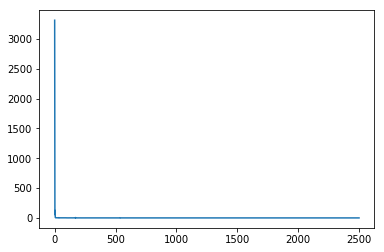

In [43]:
plt.plot(history.history['loss'])

In [44]:
model_log = create_model()
history = model_log.fit(X_train, y_log_train, epochs=2000, batch_size=8, verbose=0)

In [45]:
benchmark2(model_log)

RMSE: 52327.41438972014 
LOGRMSE: 0.2258705656342164


(52327.41438972014, 0.2258705656342164)

In [51]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(300,activation="relu")) 
    model.add(Dropout(0.2))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [52]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3350,batch_size=32,verbose=0)

In [53]:
benchmark(model)

RMSE: 28198.137935216615 
LOGRMSE: 0.1324292037123303


(28198.137935216615, 0.1324292037123303)

In [55]:
import time

In [57]:
model=create_model()
start_time = time.time()
history=model.fit(X_train,y_train,epochs=3000,batch_size=64,verbose=0)
end_time = time.time()
print("cost: {}".format((end_time -start_time) / 60))

cost: 1.8433632135391236


In [58]:
benchmark(model)

RMSE: 26289.883661508688 
LOGRMSE: 0.12675866148491305


(26289.883661508688, 0.12675866148491305)

## 用网格搜索控制单一变量

In [ ]:
batch_size = [32, 64]
epochs = [2800,2900,3000,3100,3200,3300,3400]
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, n_jobs=-1)
grid_res = grid.fit(X_train, y_train)
for mean,stdev,params in zip(grid_res.cv_results_['mean_test_score'],
                           grid_res.cv_results_['std_test_score'],
                           grid_res.cv_results_['params']):
    print("mean:{} stdev:{} params:{}".format(mean,stdev,params))
print("Best score: {} Best params:{}".format(grid_res.best_score_, grid_res.best_params_))